- Compare Slow Lanczos (PyHessian, Papyan, Demmel) and Fast Lanczos (Papyan, Demmel)
- Reproduce the experiments from Example 7.1 in the book "Applied Numerical Linear Algebra" by J. Demmel. Link: http://www.stat.uchicago.edu/~lekheng/courses/302/demmel/demmch7.pdf

In [6]:
# autoreload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import os

if os.getcwd().split("/")[-1] != "lanczos":
    os.chdir("..")
print("CWD:", os.getcwd())

CWD: /home/nadezhda/Desktop/spectral-properties-of-NN/lanczos


In [8]:
import torch
import matplotlib.pyplot as plt
from matrix import *
from utils import *
from plot_utils import plot_spectrum_combined, plot_lanczos_iterations

In [9]:
mtx_size = 100
num_iterations = 20 # number of steps of the Lanczos algorithm to visualize
seed = 10 # set seed to have the same starting vector v1 (for the Lanczos algorithm) in all expetiments

#### Generate eigenvalues

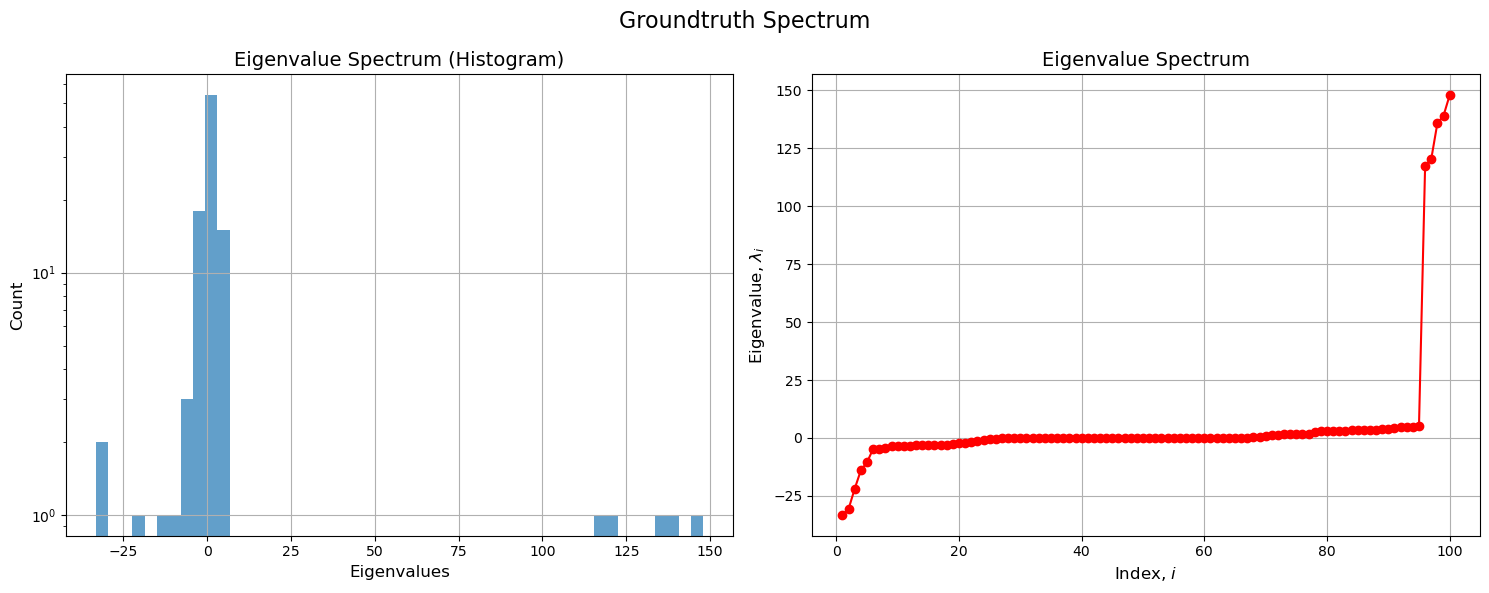

In [10]:
torch.manual_seed(1)
num_bins = 50 # number of bins for the histograms
dict_eigenvalues = {
	'num_around_zero': 50,
	'around_zero_low': -5,
	'around_zero_high': 5,
	'num_pos_extremes': 5,
	'pos_low': 100,
	'pos_high': 150,
	'num_neg_extremes': 5,
	'neg_low': -35,
	'neg_high': -10
}
eigenvalues = generate_eigenvalues(mtx_size, dict_eigenvalues)
plot_spectrum_combined(eigenvalues.numpy(), num_bins=num_bins, title='Groundtruth Spectrum')

#### Matrix computation module

In [11]:
mtx = matrix(eigenvalues)

#### Sanity check

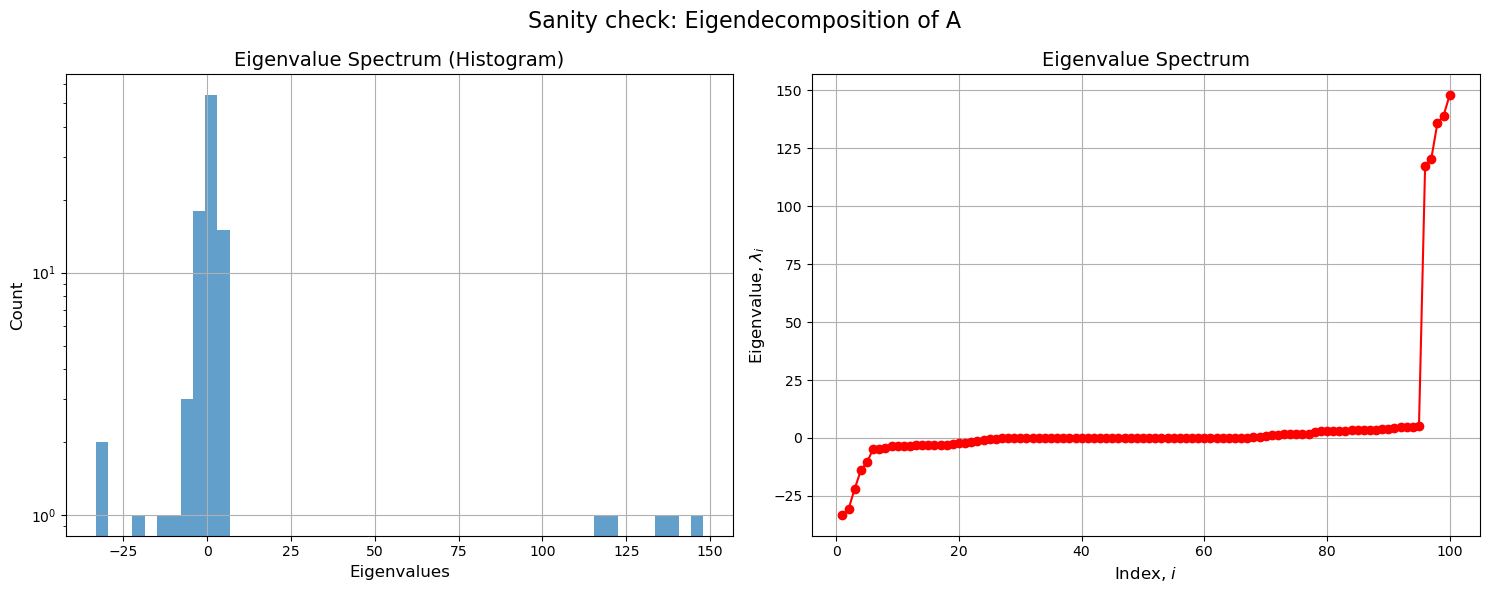

L2 distance: 0.0004764659097418189


In [12]:
A = mtx.get_matrix() # form matrix from eigenvalues and u_vectors
eigenvalues_A, _ = torch.linalg.eig(A)
eigenvalues_A = eigenvalues_A.real  # cast to real numbers
plot_spectrum_combined(eigenvalues_A.numpy(), num_bins=num_bins, title='Sanity check: Eigendecomposition of A') 
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, eigenvalues_A, 2)}")

#### Slow Lanczos algorithm (PyHessian version)

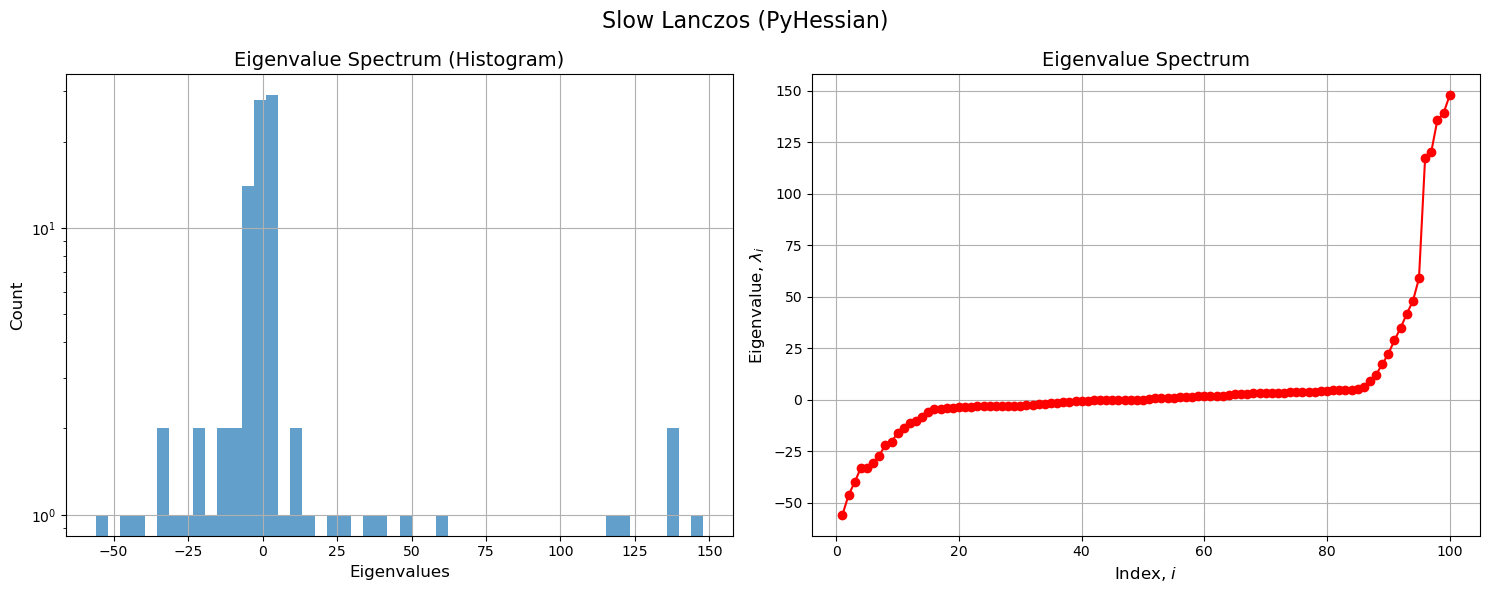

L2 distance: 112.43460083007812


In [13]:
eigenvalues_slow_lanczos_pyhessian, _, alpha_slow_pyhessian, beta_slow_pyhessian = mtx.slow_lanczos_pyhessian(mtx_size, seed=seed)
plot_spectrum_combined(eigenvalues_slow_lanczos_pyhessian, num_bins=num_bins, title='Slow Lanczos (PyHessian)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_pyhessian), 2)}")

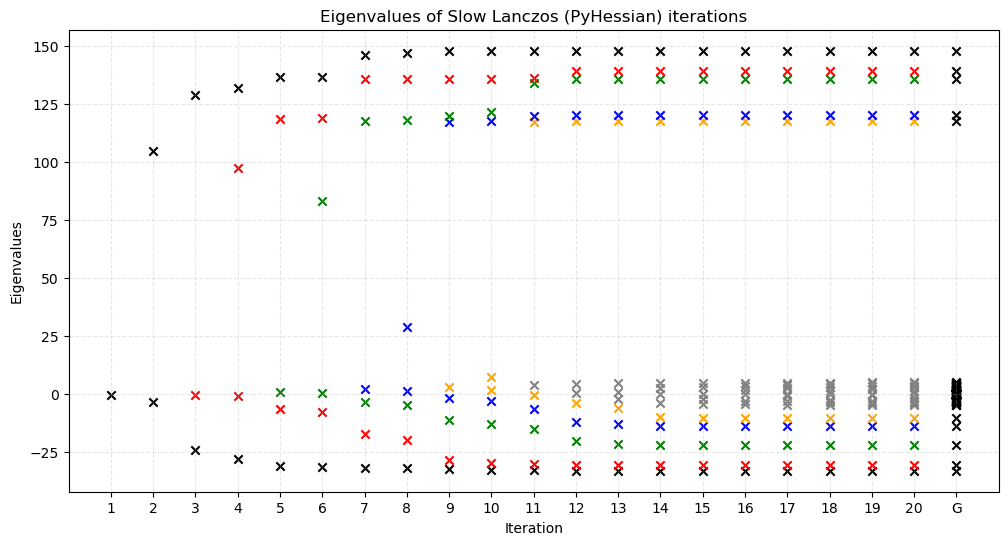

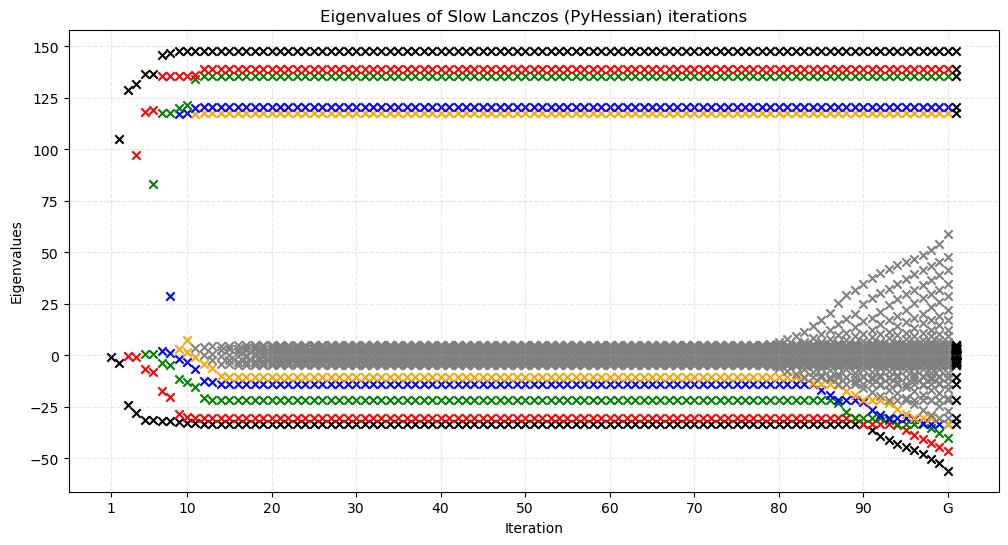

In [14]:
eigenvalues_slow_lanczos_pyhessian_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.slow_lanczos_pyhessian(iter+1, seed=seed)
    eigenvalues_slow_lanczos_pyhessian_list.append(result)
eigenvalues_slow_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_pyhessian_list, "Slow Lanczos (PyHessian)")
eigenvalues_slow_lanczos_pyhessian_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.slow_lanczos_pyhessian(iter+1, seed=seed)
    eigenvalues_slow_lanczos_pyhessian_list.append(result)
eigenvalues_slow_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_pyhessian_list, "Slow Lanczos (PyHessian)")

#### Slow Lanczos algorithm (Papyan's version)

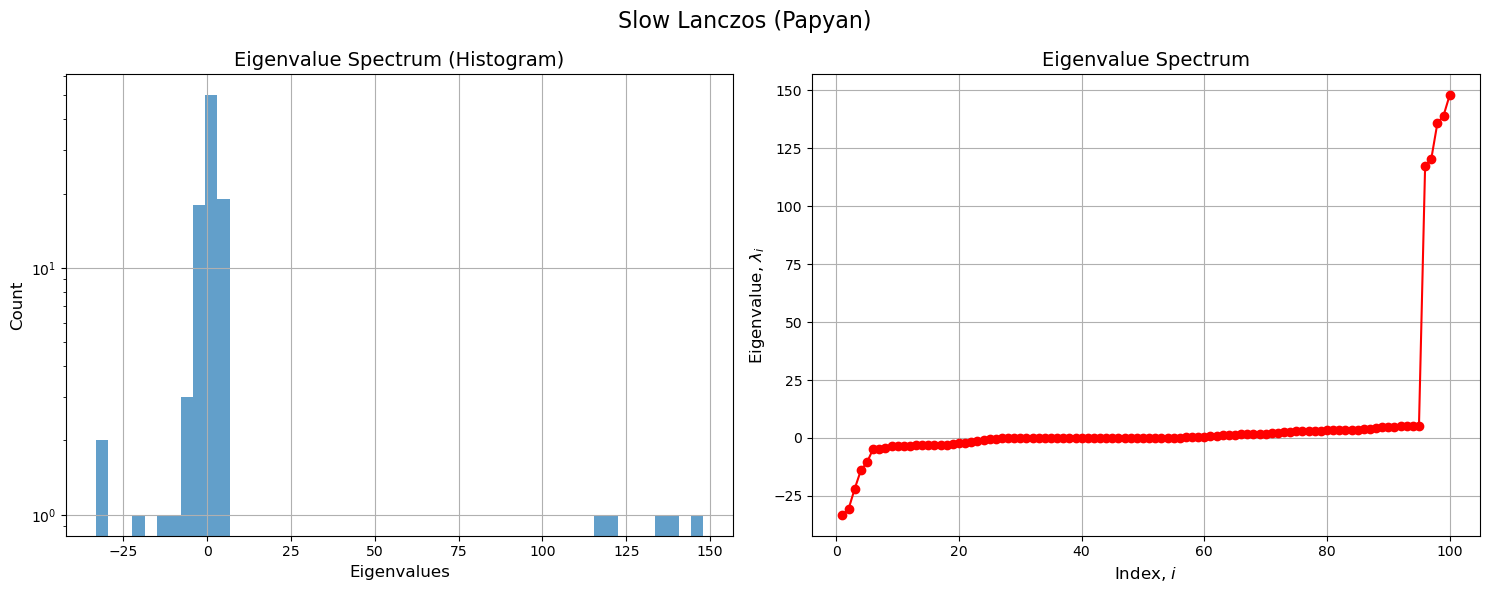

L2 distance: 5.367340564727783


In [15]:
eigenvalues_slow_lanczos_papyan, _, alpha_slow_papyan, beta_slow_papyan = mtx.slow_lanczos_papyan(mtx_size, seed=seed)
plot_spectrum_combined(eigenvalues_slow_lanczos_papyan, num_bins=num_bins, title='Slow Lanczos (Papyan)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_papyan), 2)}")

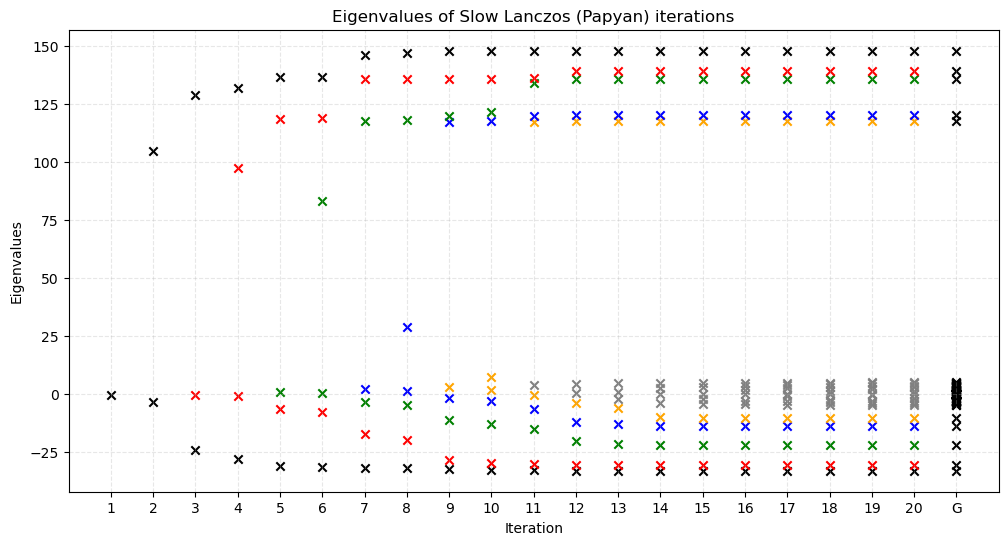

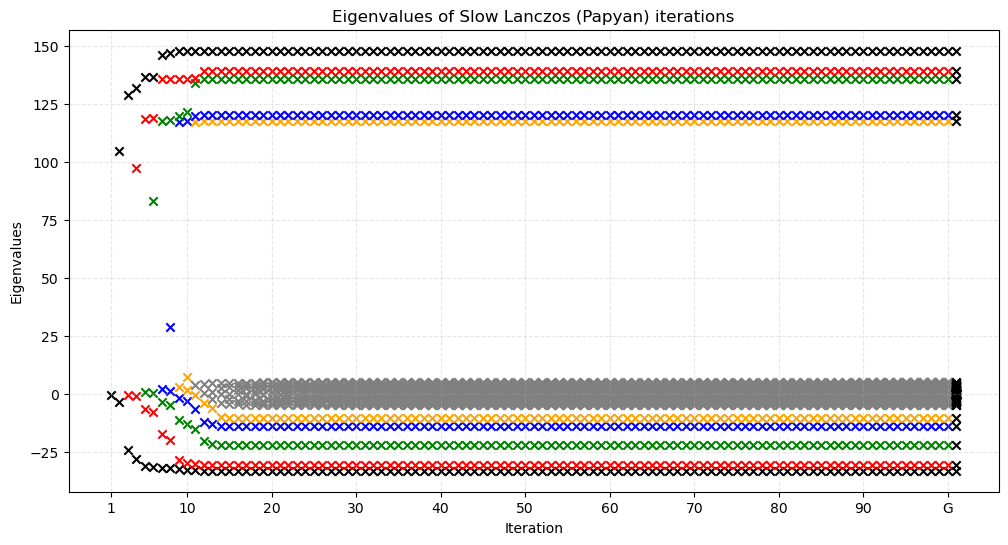

In [16]:
eigenvalues_slow_lanczos_papyan_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.slow_lanczos_papyan(iter+1, seed=seed)
    eigenvalues_slow_lanczos_papyan_list.append(result)
eigenvalues_slow_lanczos_papyan_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_papyan_list, "Slow Lanczos (Papyan)")
eigenvalues_slow_lanczos_papyan_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.slow_lanczos_papyan(iter+1, seed=seed)
    eigenvalues_slow_lanczos_papyan_list.append(result)
eigenvalues_slow_lanczos_papyan_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_papyan_list, "Slow Lanczos (Papyan)")

#### Slow Lanczos algorithm (Demmel's version)

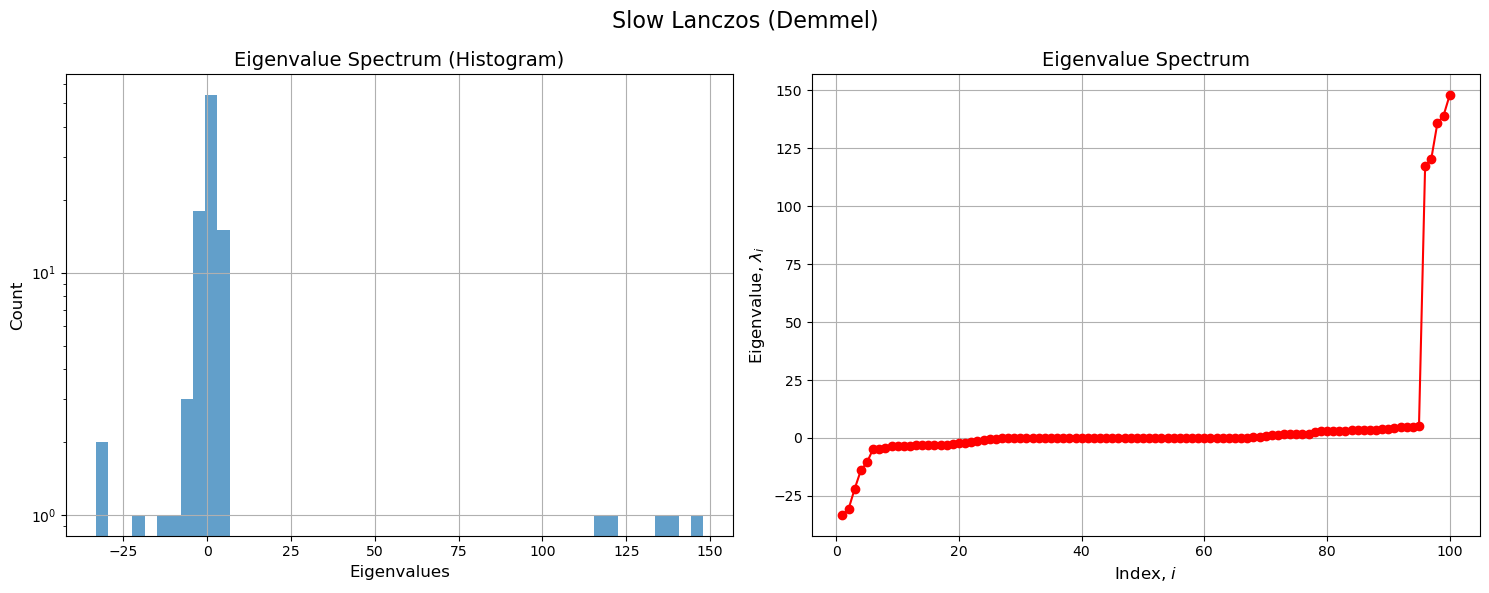

L2 distance: 0.00024566869251430035


In [17]:
eigenvalues_slow_lanczos_demmel, _, alpha_slow_demmel, beta_slow_demmel = mtx.slow_lanczos_demmel(mtx_size, seed=seed)
plot_spectrum_combined(eigenvalues_slow_lanczos_demmel, num_bins=num_bins, title='Slow Lanczos (Demmel)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_demmel), 2)}")

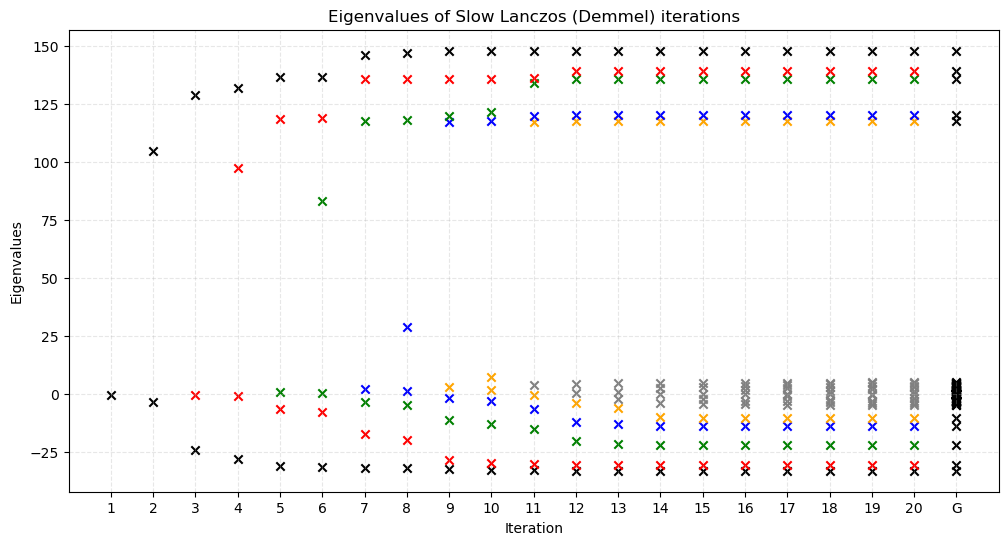

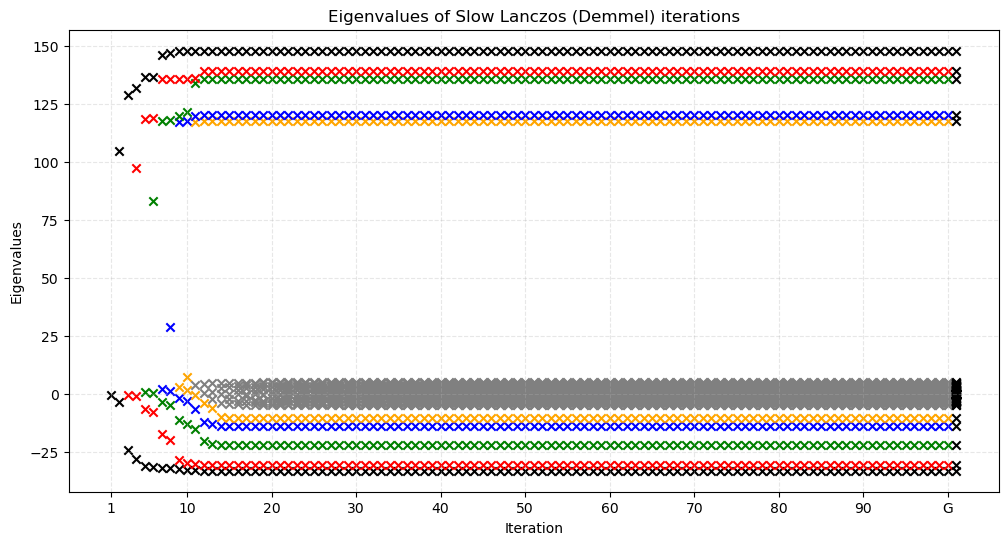

In [18]:
eigenvalues_slow_lanczos_demmel_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.slow_lanczos_demmel(iter+1, seed=seed)
    eigenvalues_slow_lanczos_demmel_list.append(result)
eigenvalues_slow_lanczos_demmel_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_demmel_list, "Slow Lanczos (Demmel)")
eigenvalues_slow_lanczos_demmel_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.slow_lanczos_demmel(iter+1, seed=seed)
    eigenvalues_slow_lanczos_demmel_list.append(result)
eigenvalues_slow_lanczos_demmel_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_slow_lanczos_demmel_list, "Slow Lanczos (Demmel)")

#### Fast Lanczos algorithm (Papyan's version)

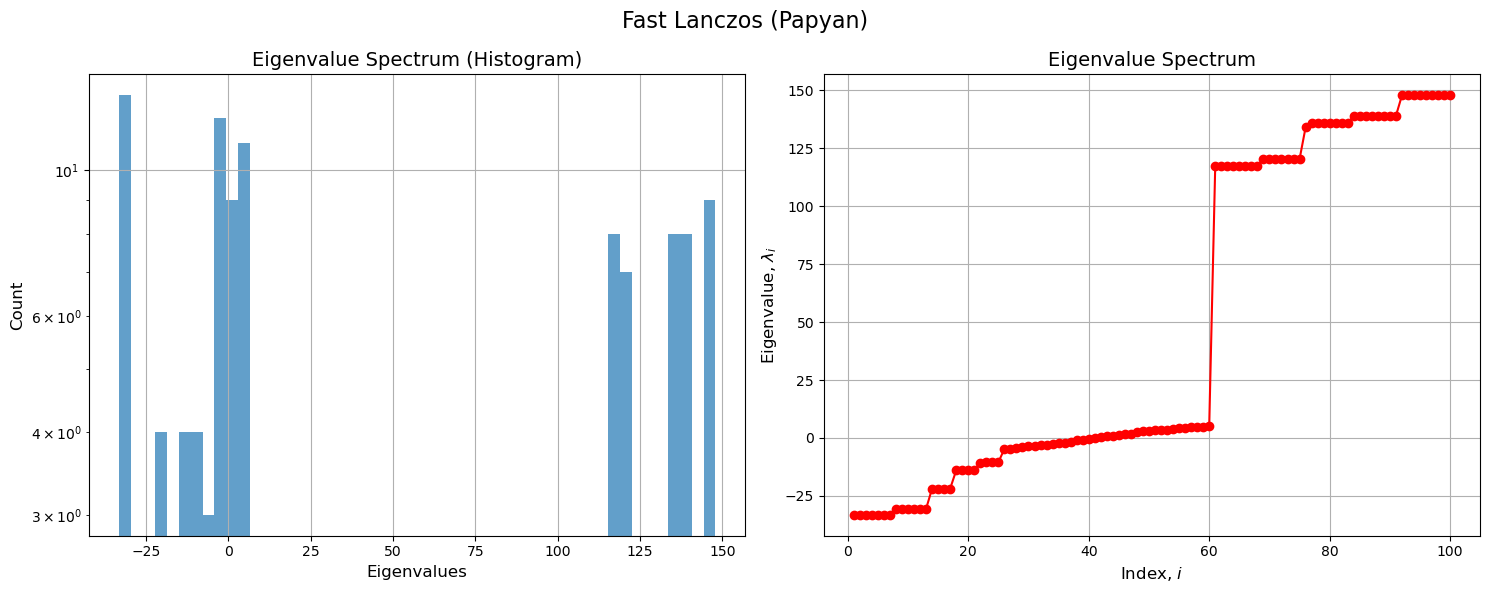

L2 distance: 768.751953125


In [19]:
eigenvalues_fast_lanczos_papyan, _, alpha_fast_papyan, beta_fast_papyan =  mtx.fast_lanczos_papyan(mtx_size)
plot_spectrum_combined(eigenvalues_fast_lanczos_papyan, num_bins=num_bins, title='Fast Lanczos (Papyan)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_fast_lanczos_papyan), 2)}")

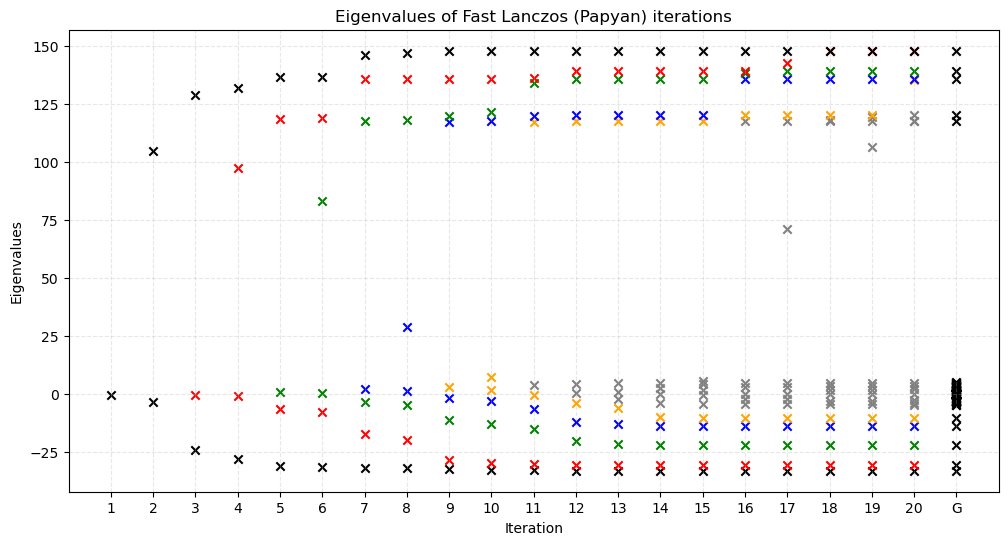

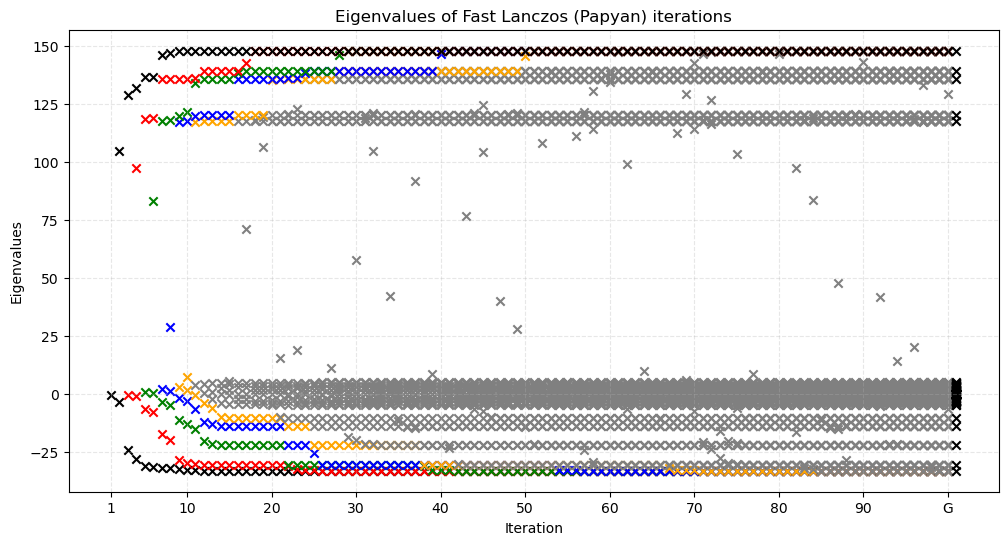

In [20]:
eigenvalues_fast_lanczos_papyan_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.fast_lanczos_papyan(iter+1, seed=seed)
    eigenvalues_fast_lanczos_papyan_list.append(result)
eigenvalues_fast_lanczos_papyan_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_fast_lanczos_papyan_list, "Fast Lanczos (Papyan)")
eigenvalues_fast_lanczos_papyan_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.fast_lanczos_papyan(iter+1, seed=seed)
    eigenvalues_fast_lanczos_papyan_list.append(result)
eigenvalues_fast_lanczos_papyan_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_fast_lanczos_papyan_list, "Fast Lanczos (Papyan)")

#### Fast Lanczos algorithm (Demmel's version)

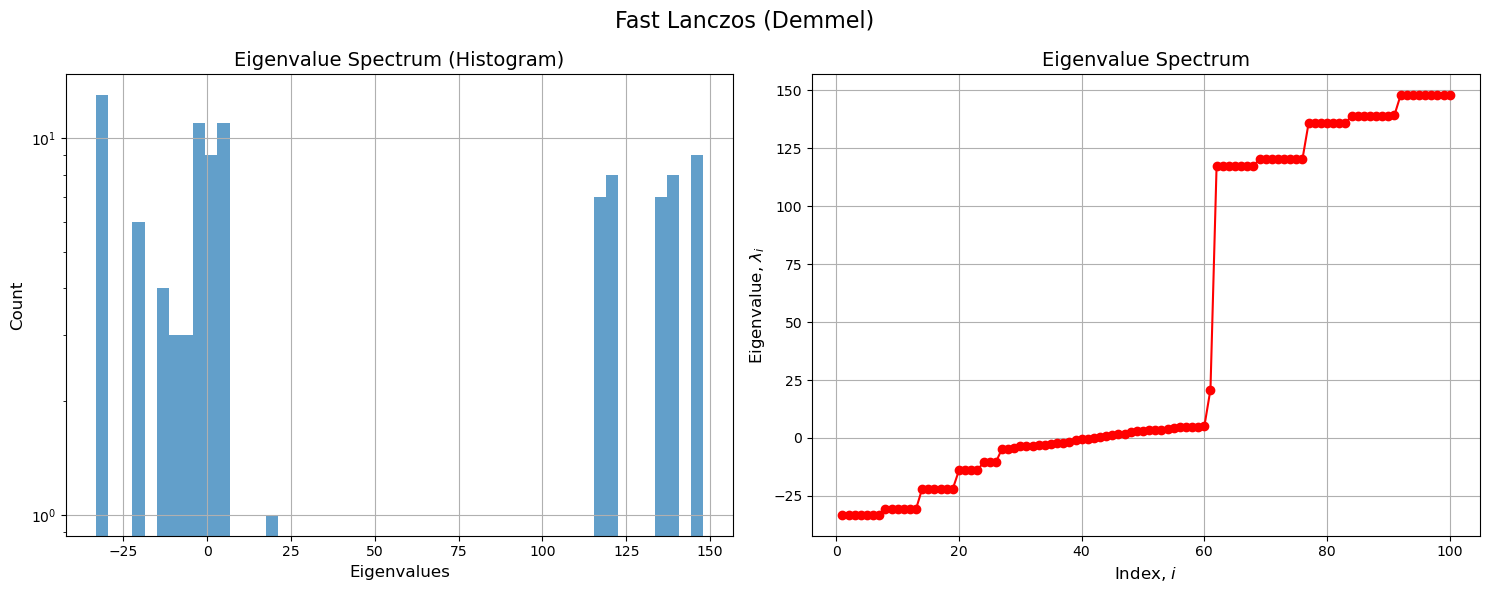

L2 distance: 758.2838134765625


In [21]:
eigenvalues_fast_lanczos_demmel, _, alpha_fast_demmel, beta_fast_demmel =  mtx.fast_lanczos_demmel(mtx_size)
plot_spectrum_combined(eigenvalues_fast_lanczos_demmel, num_bins=num_bins, title='Fast Lanczos (Demmel)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_fast_lanczos_demmel), 2)}")

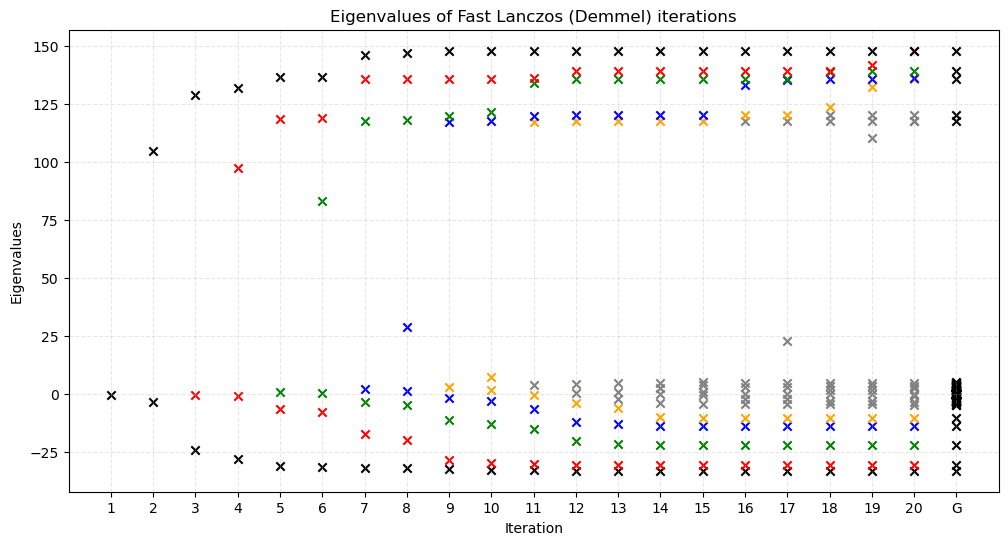

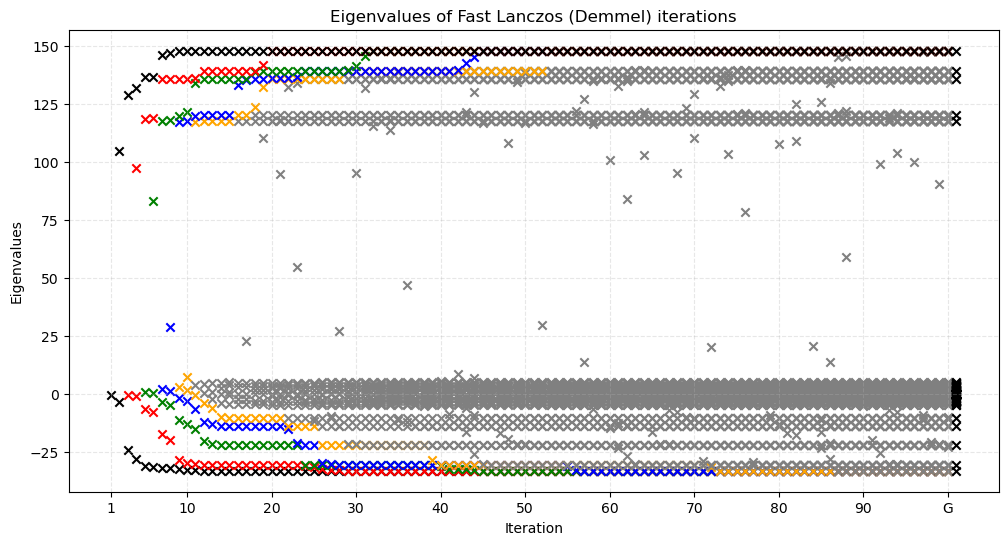

In [22]:
eigenvalues_fast_lanczos_demmel_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.fast_lanczos_demmel(iter+1, seed=seed)
    eigenvalues_fast_lanczos_demmel_list.append(result)
eigenvalues_fast_lanczos_demmel_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_fast_lanczos_demmel_list, "Fast Lanczos (Demmel)")
eigenvalues_fast_lanczos_demmel_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.fast_lanczos_demmel(iter+1, seed=seed)
    eigenvalues_fast_lanczos_demmel_list.append(result)
eigenvalues_fast_lanczos_demmel_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_fast_lanczos_demmel_list, "Fast Lanczos (Demmel)")

#### $d$-Lanczos (PyHessian's version)

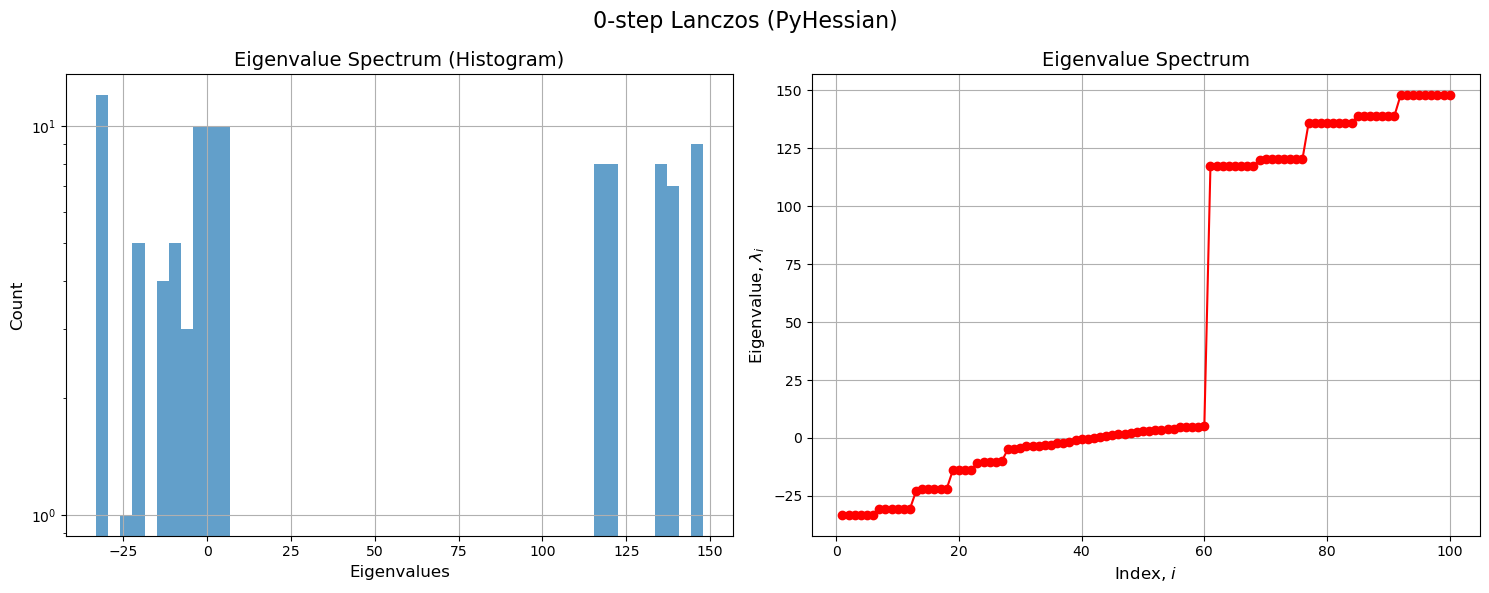

L2 distance: 765.8751220703125


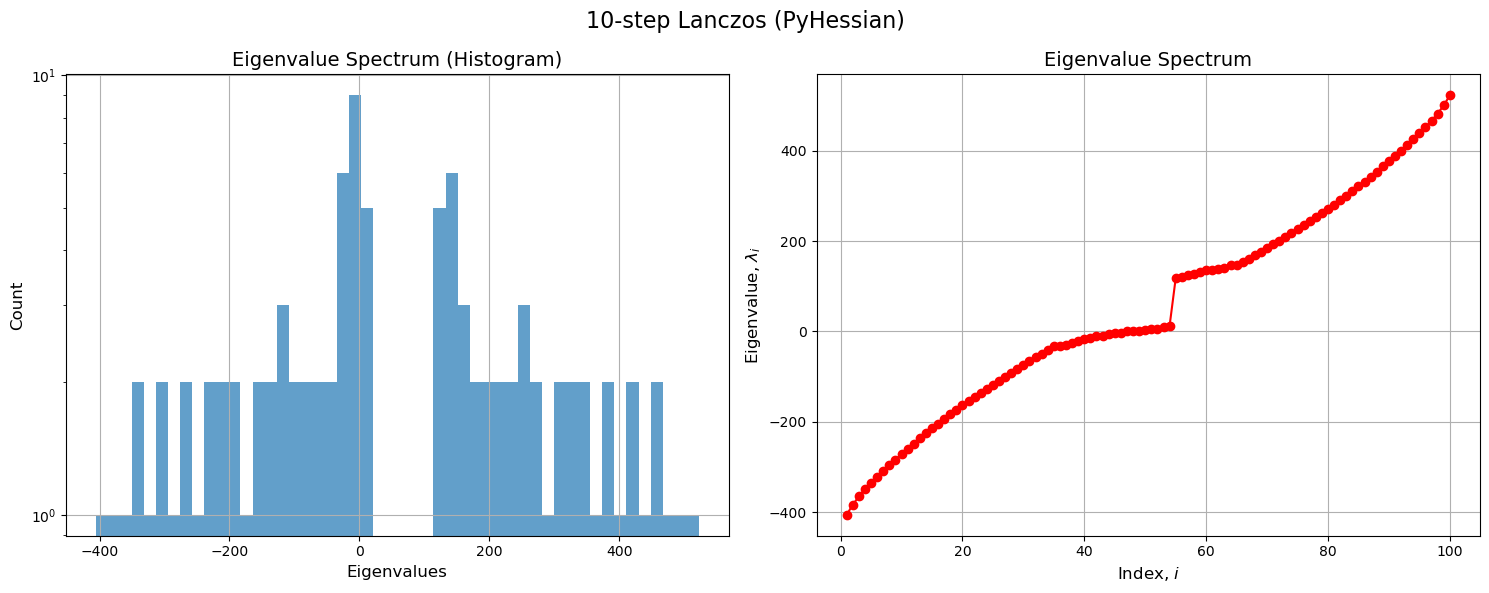

L2 distance: 2236.747802734375


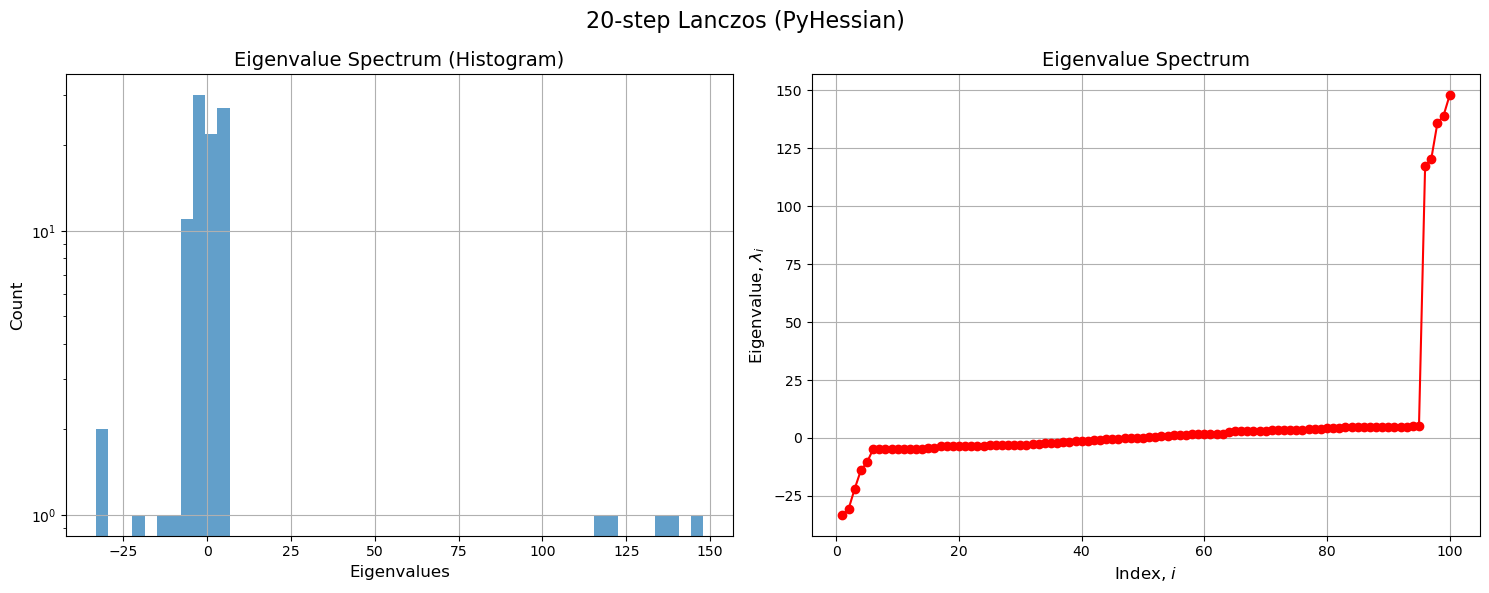

L2 distance: 15.945684432983398


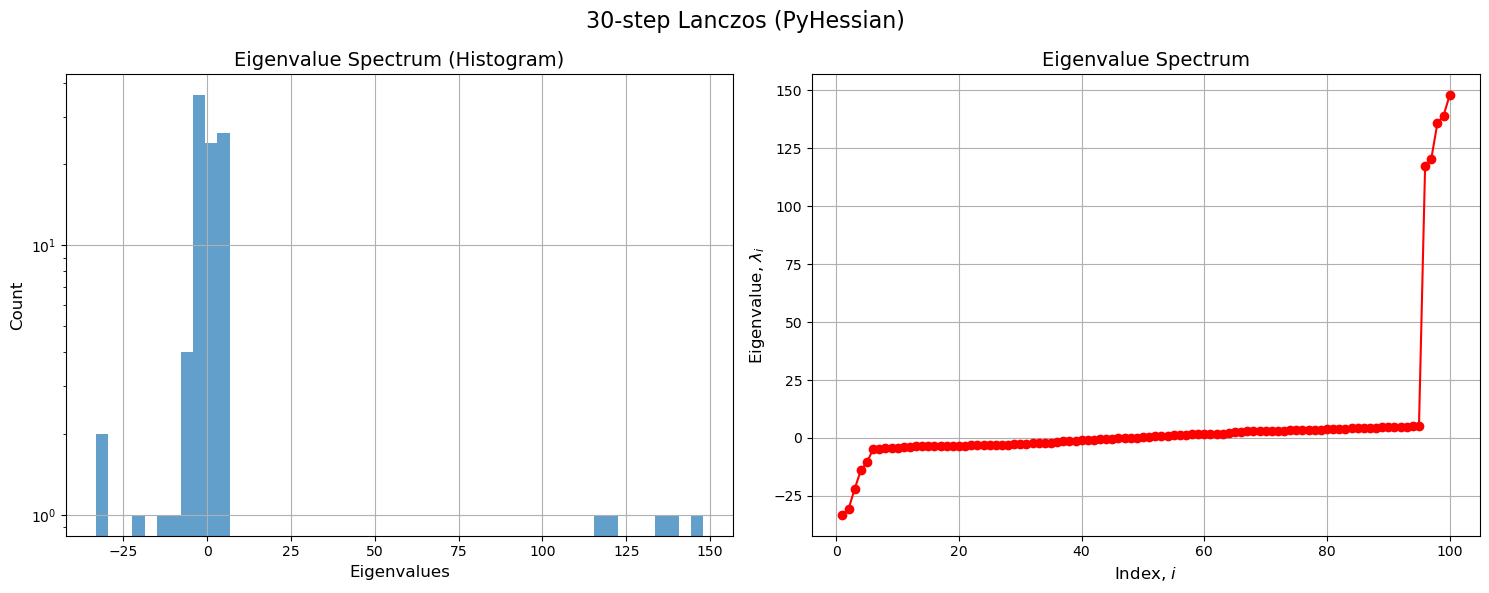

L2 distance: 13.973076820373535


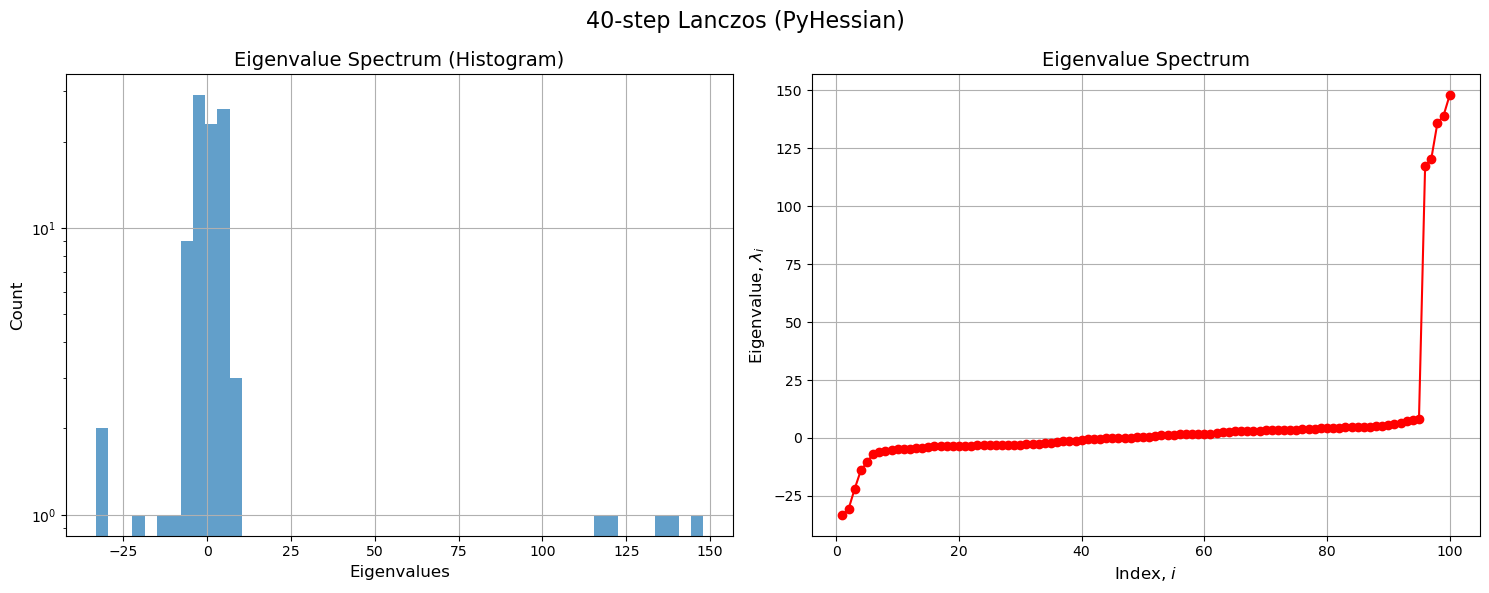

L2 distance: 17.161724090576172


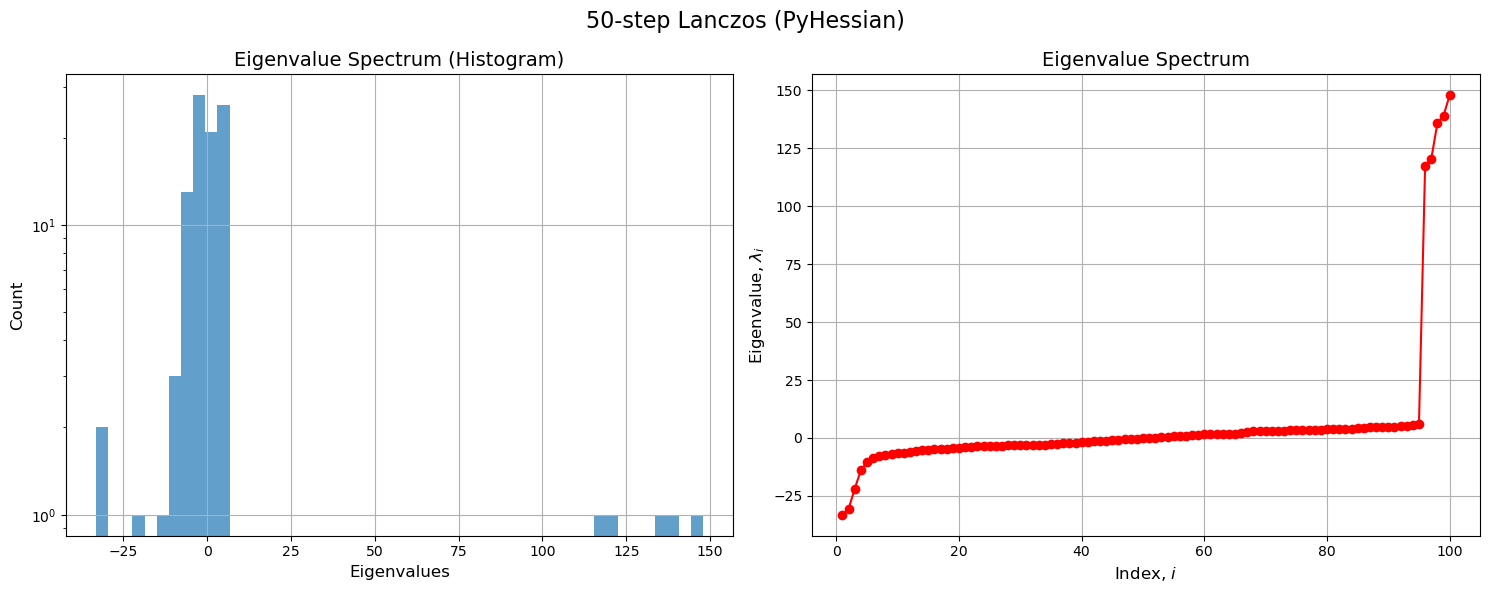

L2 distance: 18.385900497436523


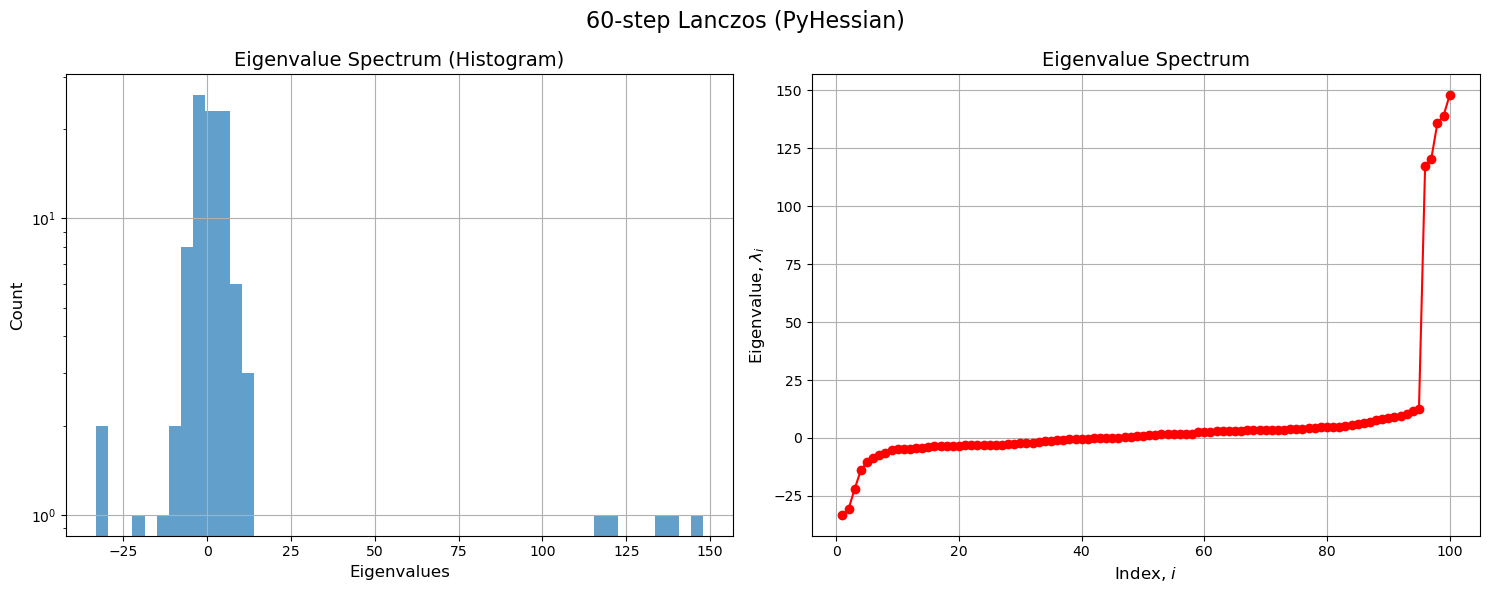

L2 distance: 23.530874252319336


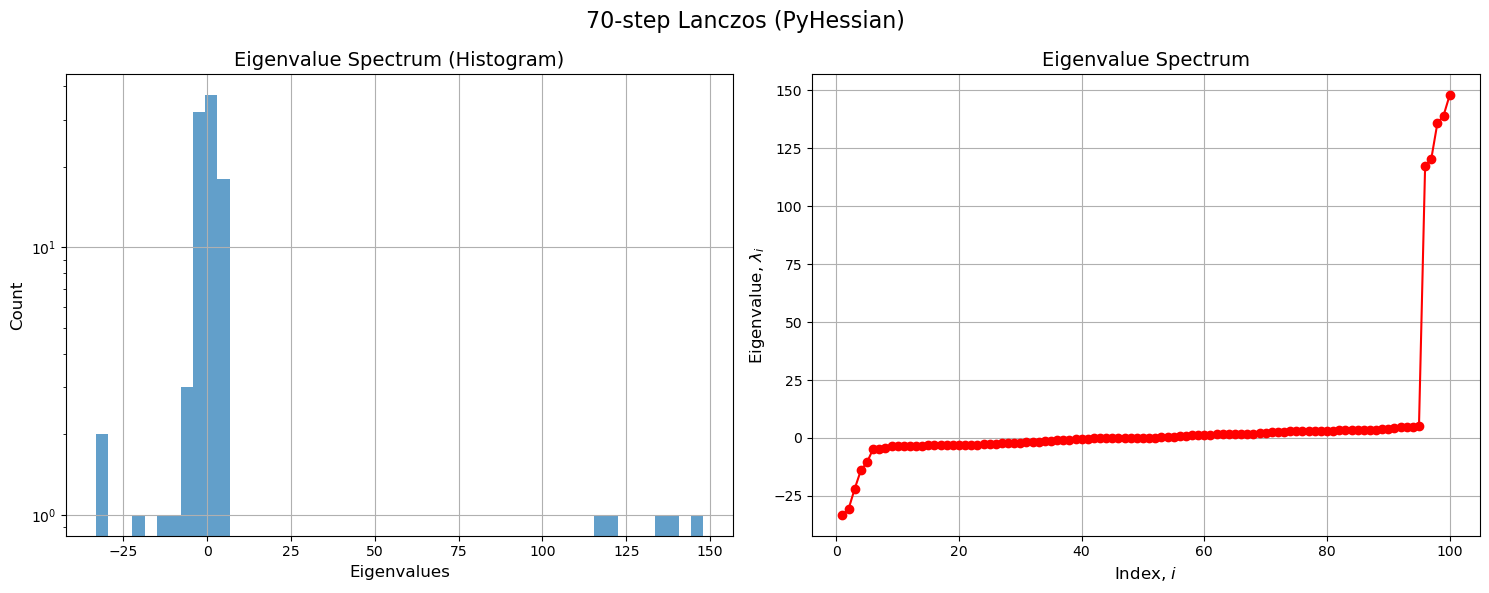

L2 distance: 9.696389198303223


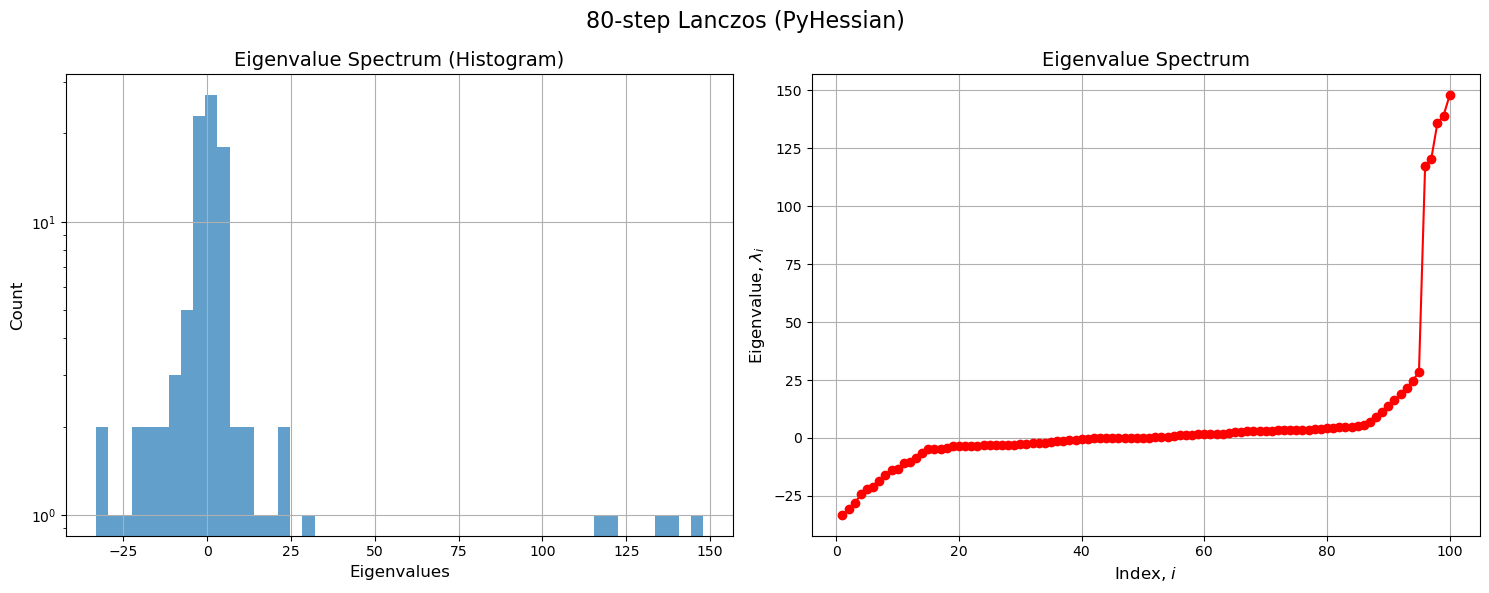

L2 distance: 56.62677764892578


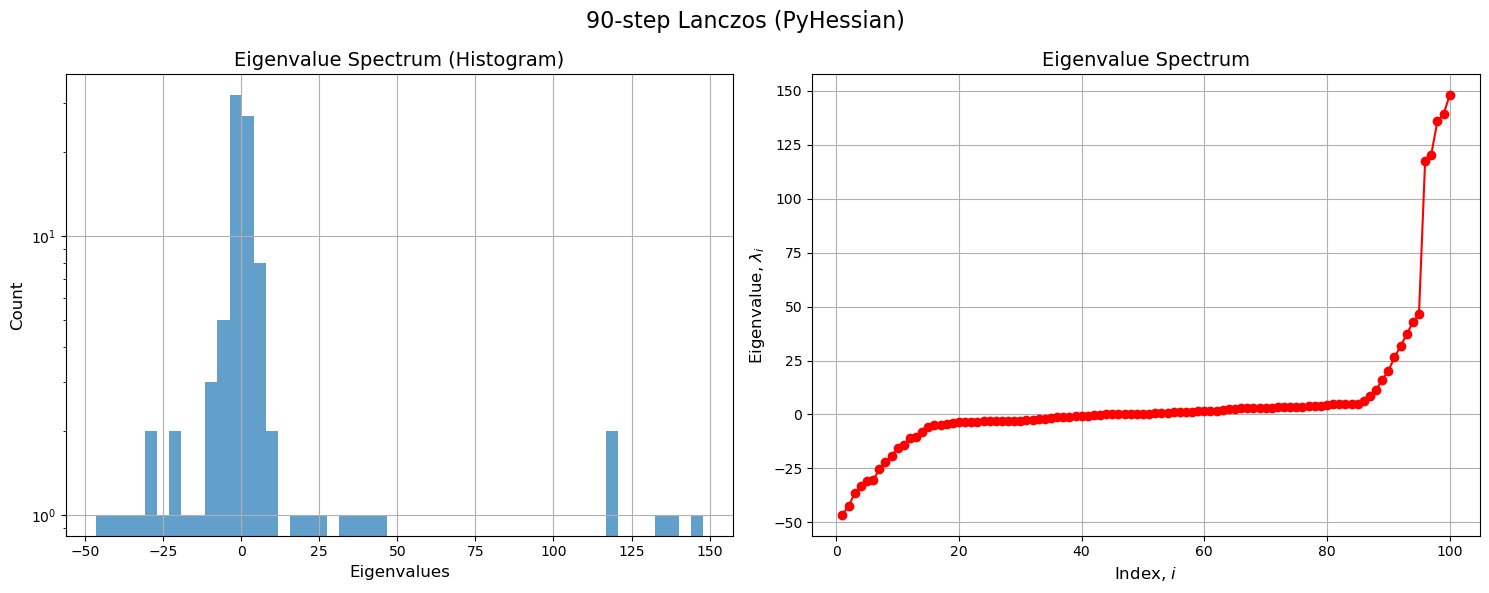

L2 distance: 97.56775665283203


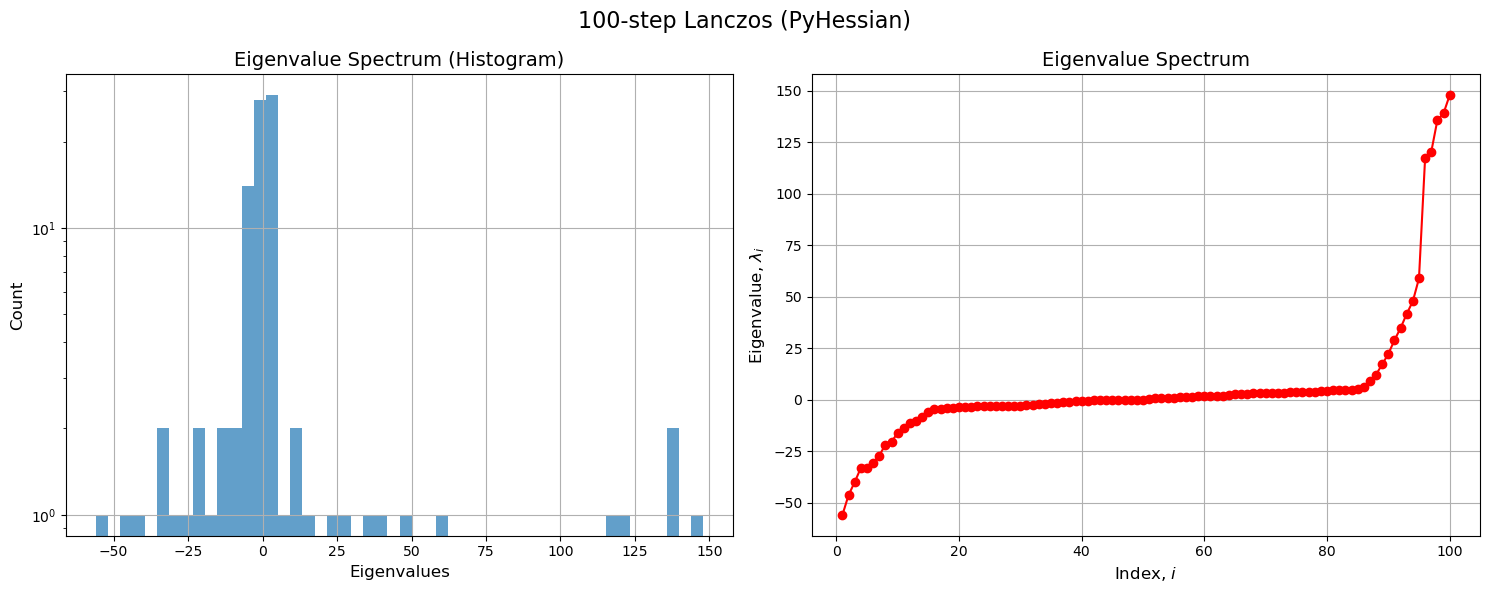

L2 distance: 112.43460083007812


In [23]:
# find reasonable d for d-step Lanczos
for d in range(0, mtx_size+10, 10):
    eigenvalues_d_lanczos_pyhessian, _, _, _ = mtx.d_lanczos_pyhessian(mtx_size, seed=seed, d=d)
    plot_spectrum_combined(eigenvalues_d_lanczos_pyhessian, num_bins=num_bins, title=f'{d}-step Lanczos (PyHessian)')
    print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_d_lanczos_pyhessian), 2)}")

#### $d$-Lanczos (Papyan's version)

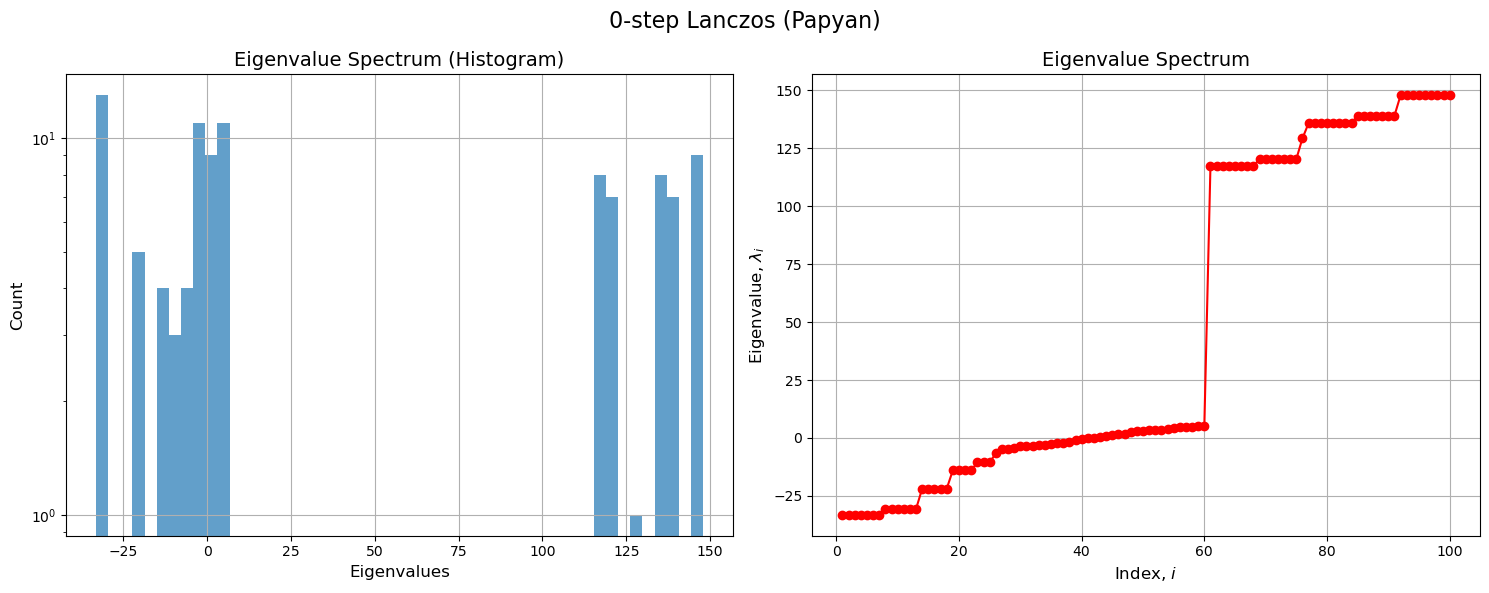

L2 distance: 767.6098022460938


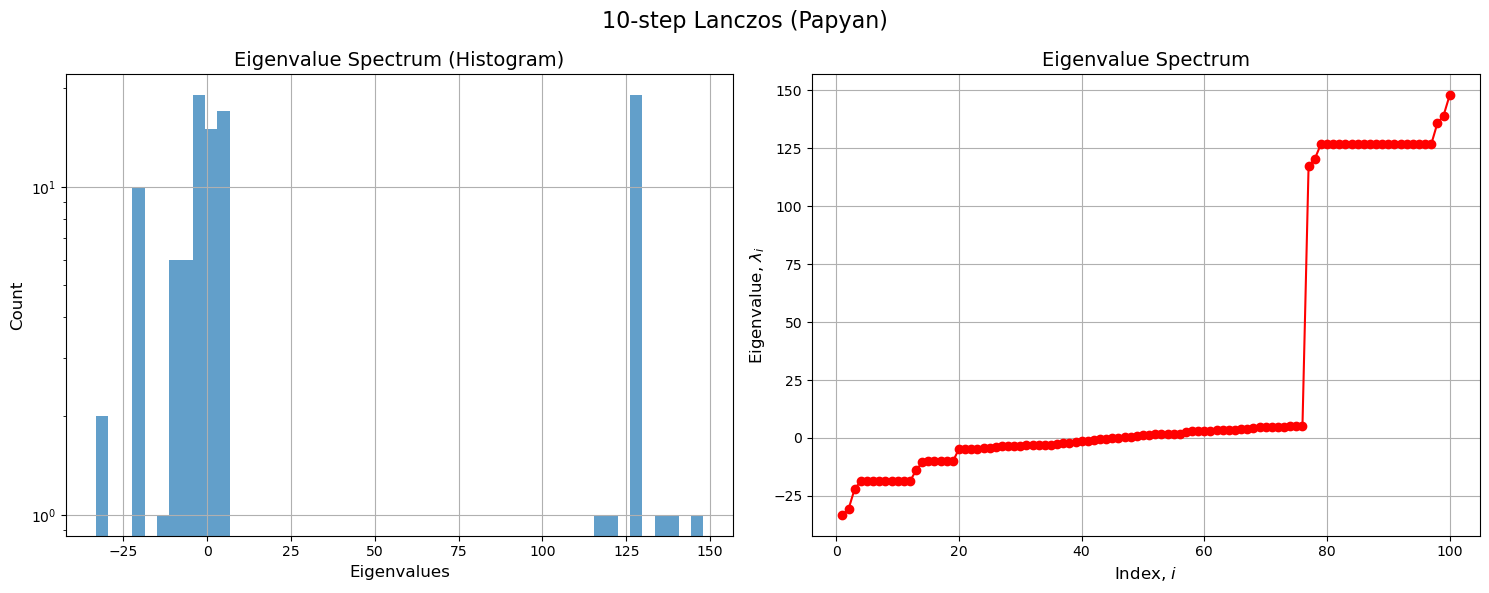

L2 distance: 535.863037109375


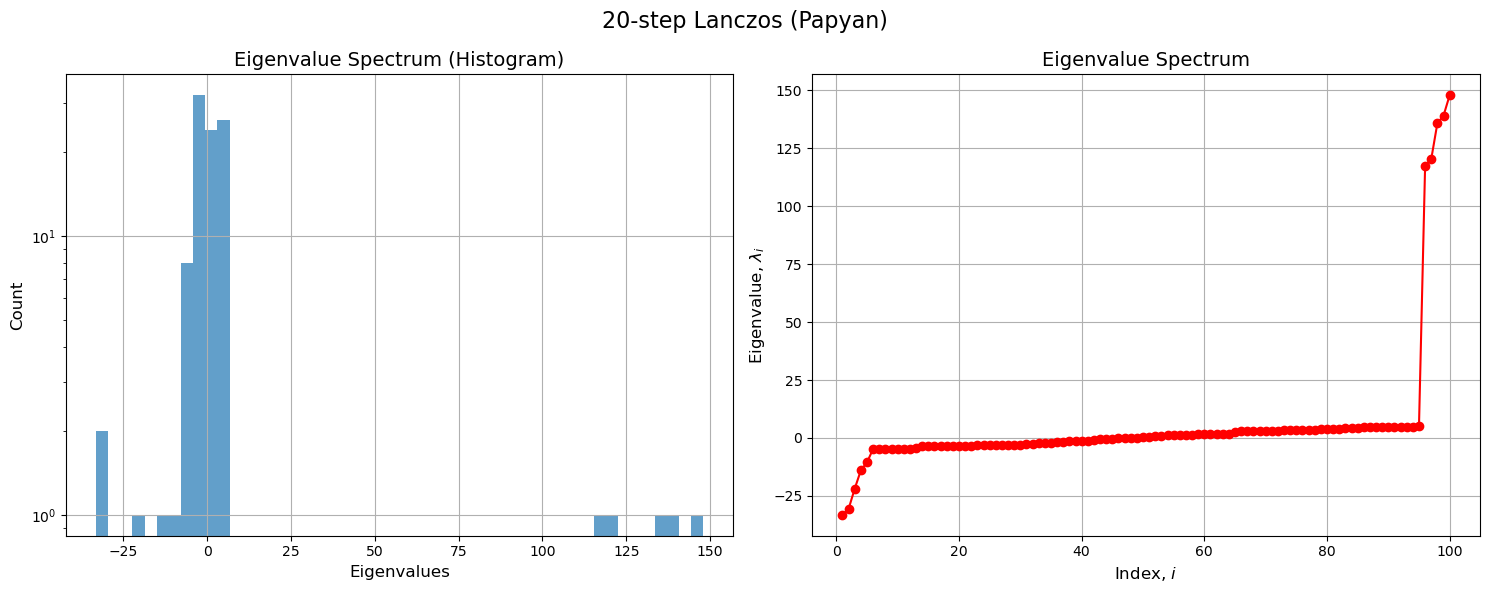

L2 distance: 14.684502601623535


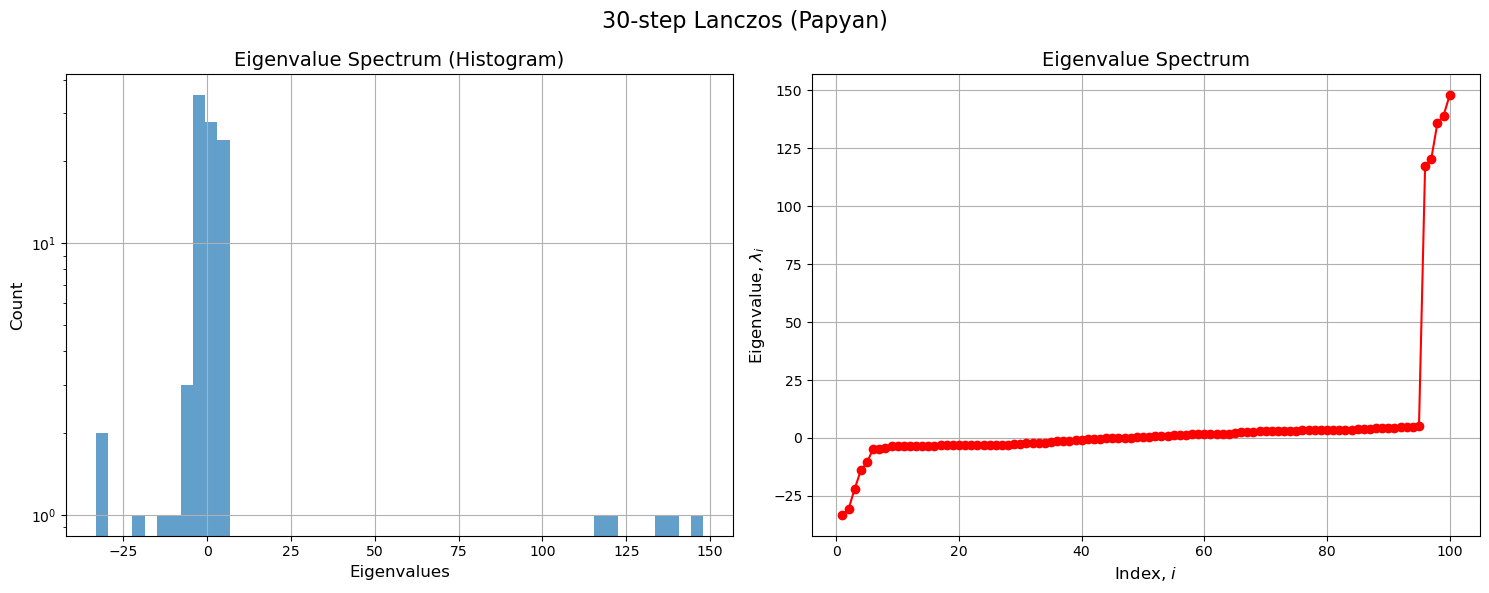

L2 distance: 12.949710845947266


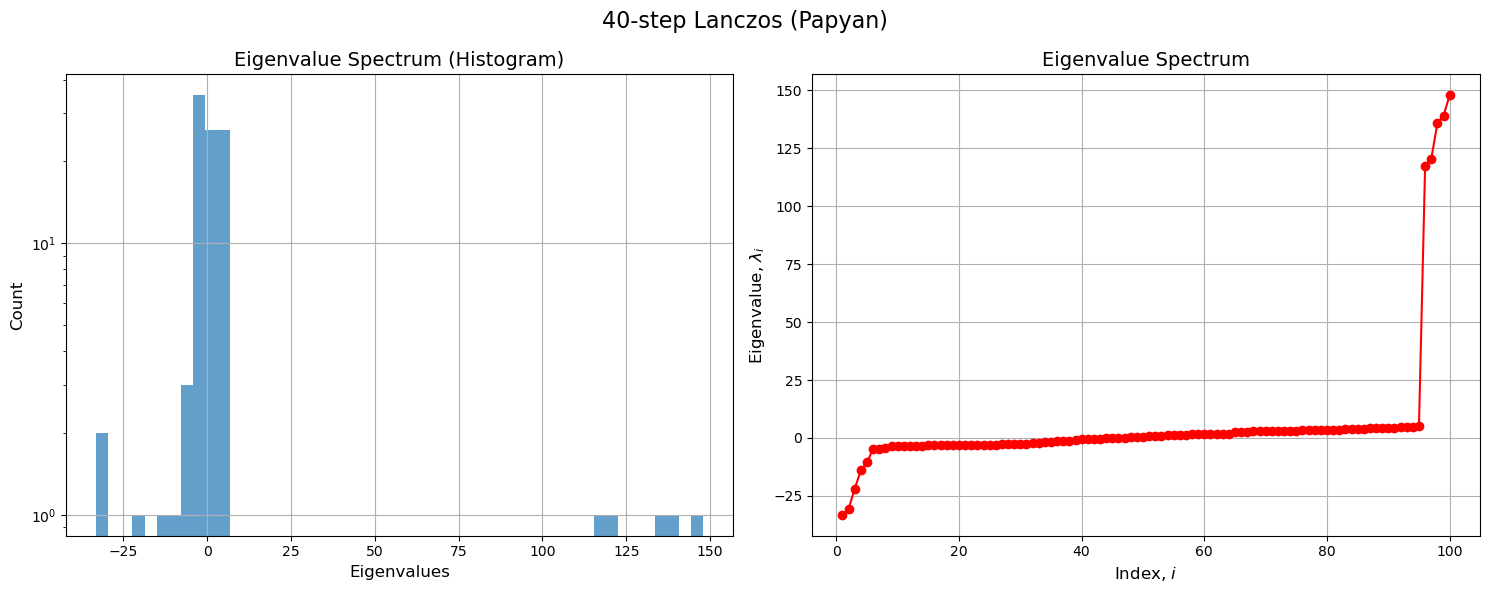

L2 distance: 12.929033279418945


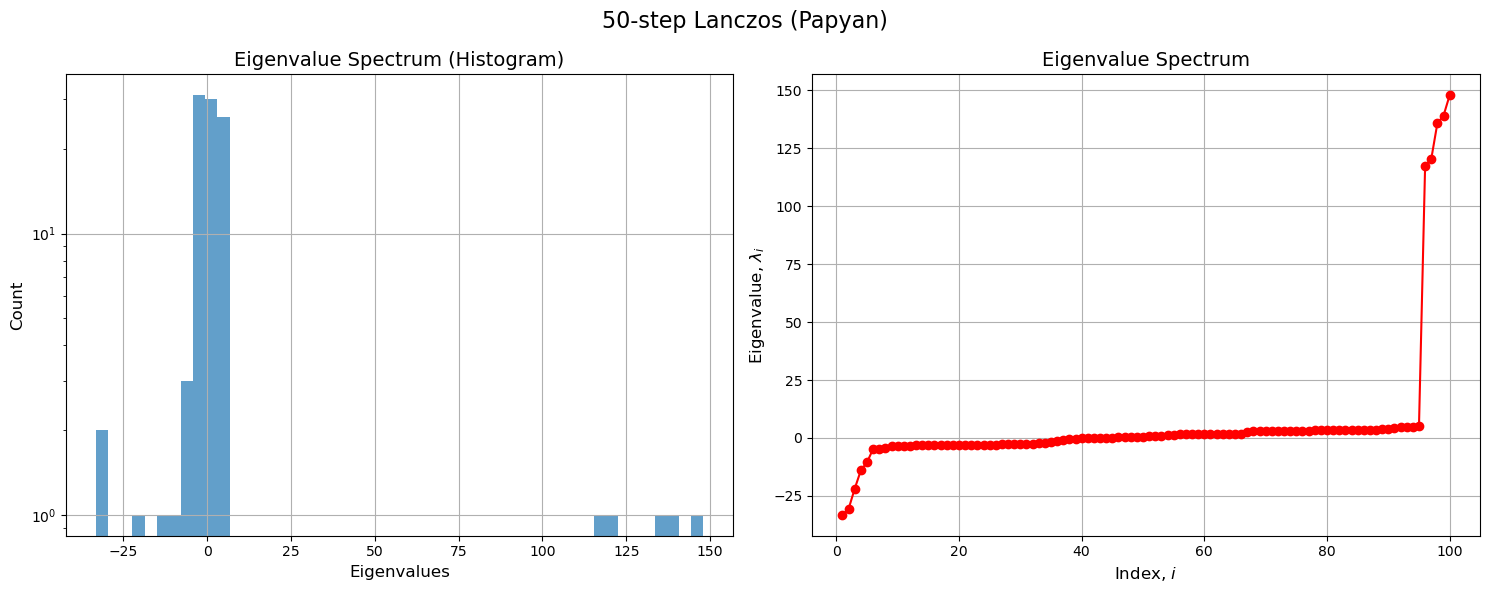

L2 distance: 12.561832427978516


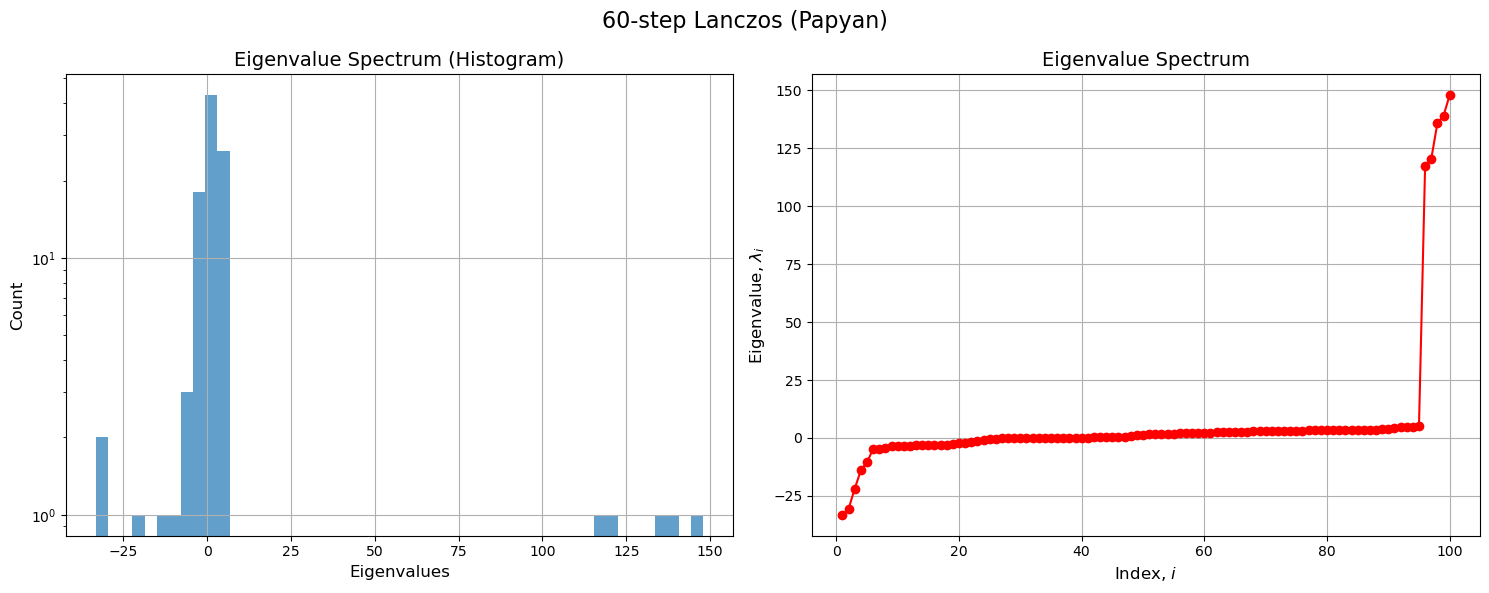

L2 distance: 11.109079360961914


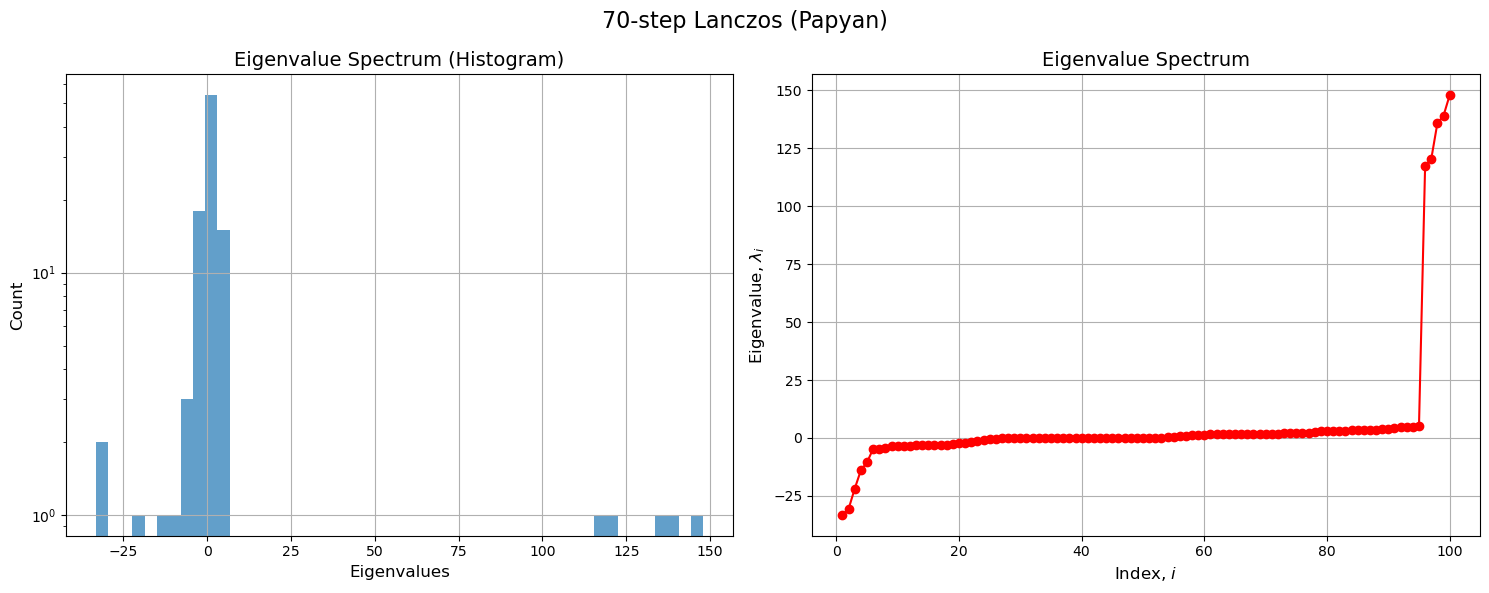

L2 distance: 5.449165344238281


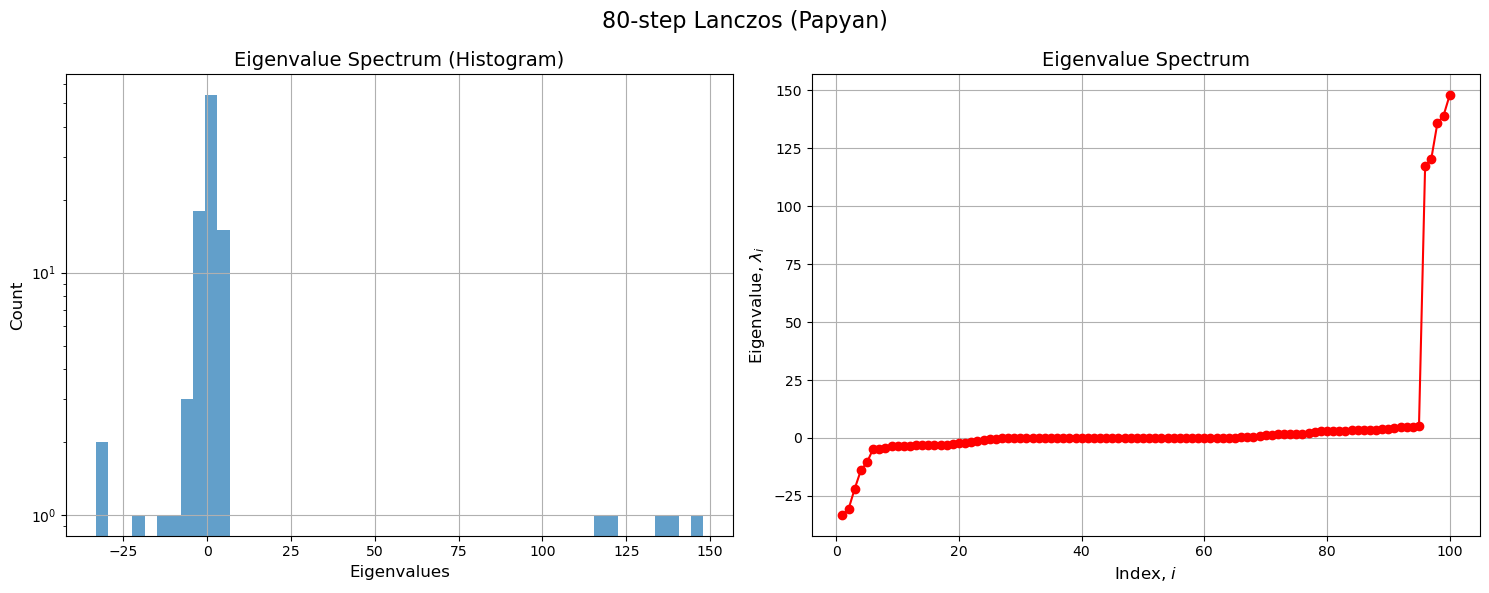

L2 distance: 1.1466997861862183


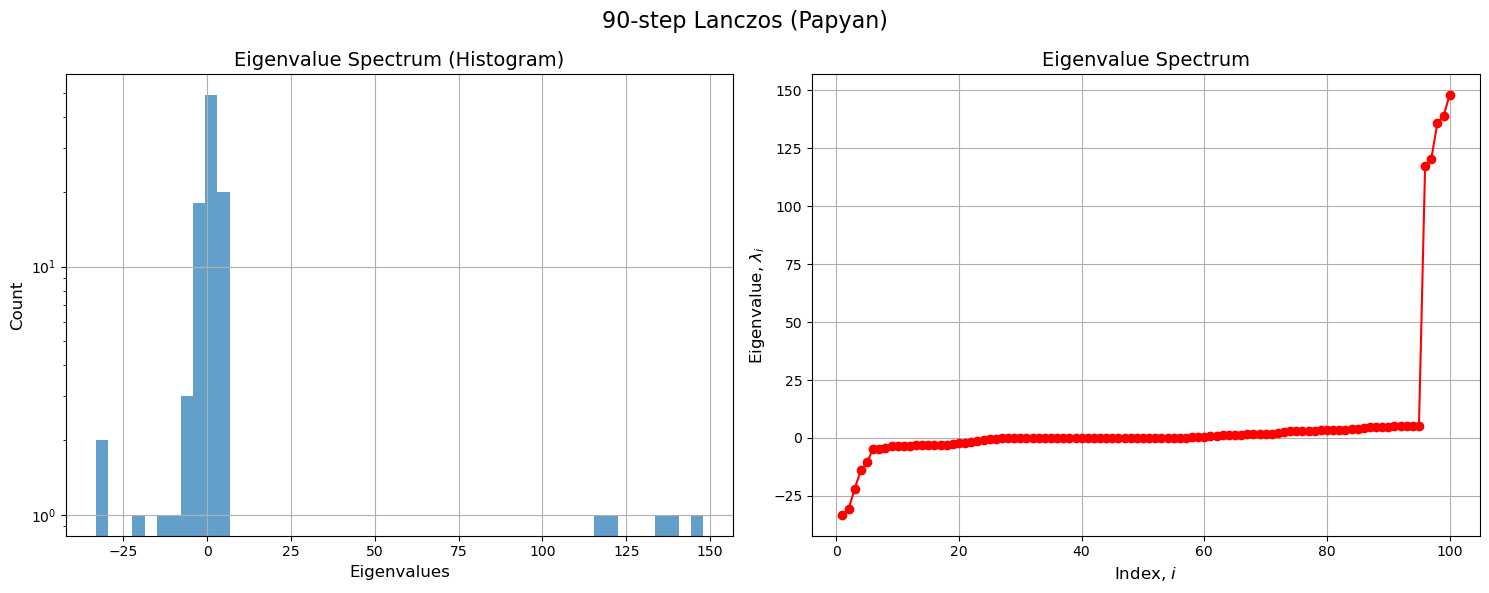

L2 distance: 5.7252326011657715


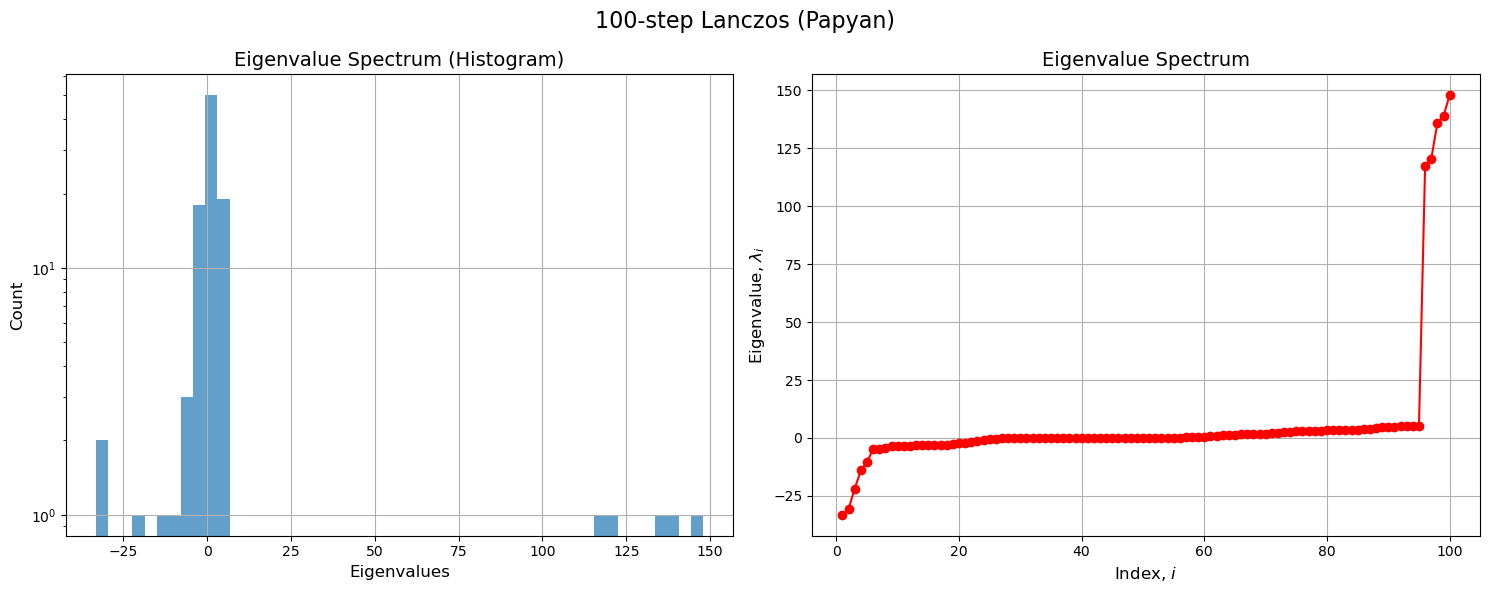

L2 distance: 5.367340564727783


In [24]:
# find reasonable d for d-step Lanczos
for d in range(0, mtx_size+10, 10):
    eigenvalues_d_lanczos_papyan, _, _, _ = mtx.d_lanczos_papyan(mtx_size, seed=seed, d=d)
    plot_spectrum_combined(eigenvalues_d_lanczos_papyan, num_bins=num_bins, title=f'{d}-step Lanczos (Papyan)')
    print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_d_lanczos_papyan), 2)}")

#### 15-Lanczos (PyHessian's version)

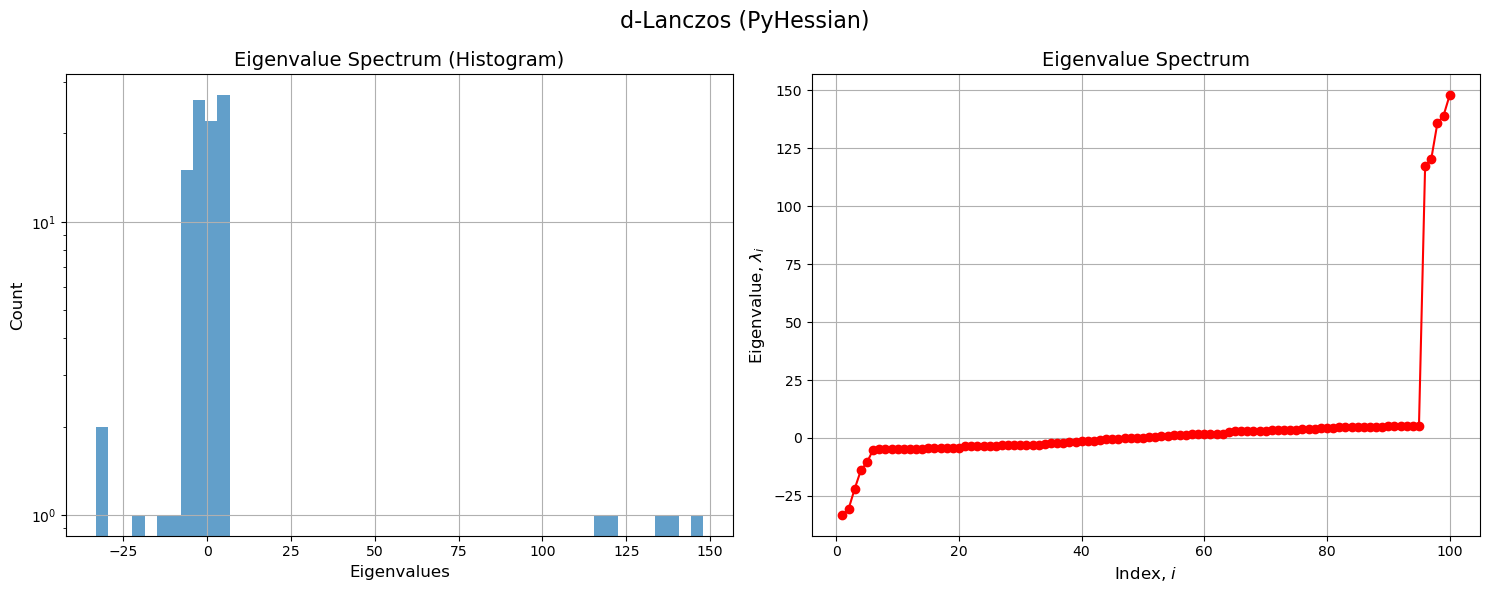

L2 distance: 16.783416748046875


In [25]:
d_value_pyhessian = 15
eigenvalues_d_lanzcos_pyhessian, _, alpha_d_pyhessian, beta_d_pyhessian = mtx.d_lanczos_pyhessian(mtx_size, seed=seed, d=d_value_pyhessian)
plot_spectrum_combined(eigenvalues_d_lanzcos_pyhessian, num_bins=num_bins, title='d-Lanczos (PyHessian)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_d_lanzcos_pyhessian), 2)}")

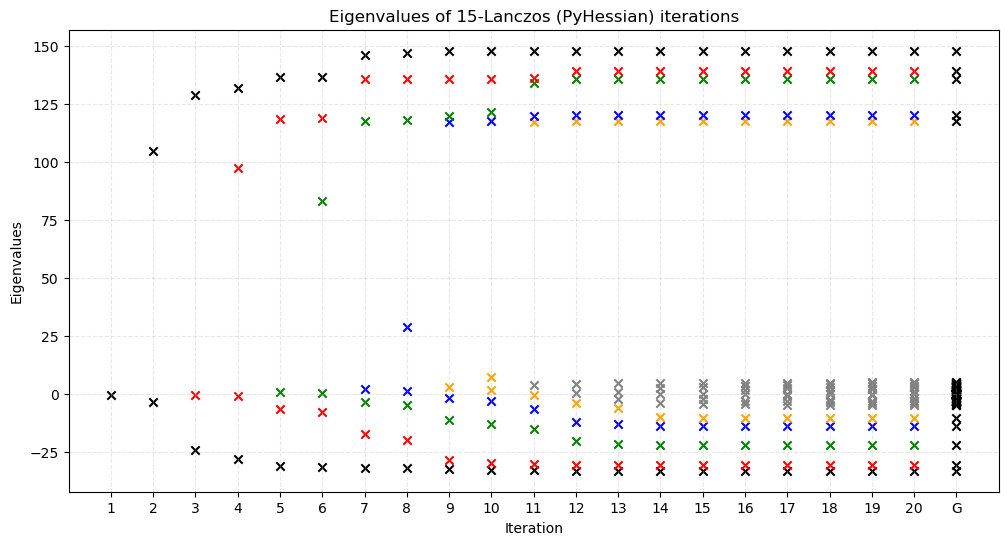

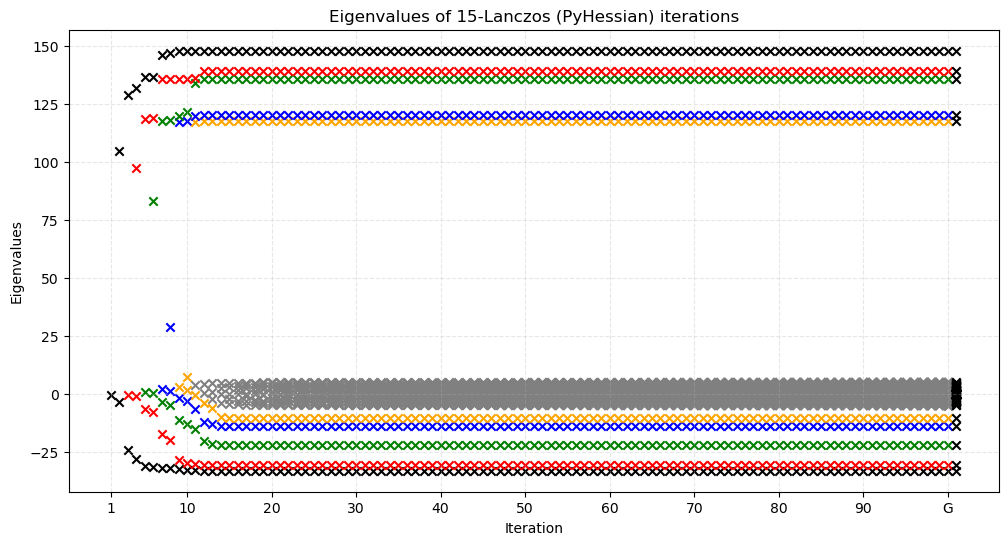

In [26]:
eigenvalues_d_lanczos_pyhessian_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.d_lanczos_pyhessian(iter+1, seed=seed, d=d_value_pyhessian)
    eigenvalues_d_lanczos_pyhessian_list.append(result)
eigenvalues_d_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_d_lanczos_pyhessian_list, f"{d_value_pyhessian}-Lanczos (PyHessian)")
eigenvalues_d_lanczos_pyhessian_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.d_lanczos_pyhessian(iter+1, seed=seed, d=d_value_pyhessian)
    eigenvalues_d_lanczos_pyhessian_list.append(result)
eigenvalues_d_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_d_lanczos_pyhessian_list, f"{d_value_pyhessian}-Lanczos (PyHessian)")

#### 15-Lanczos (Papyan's version)

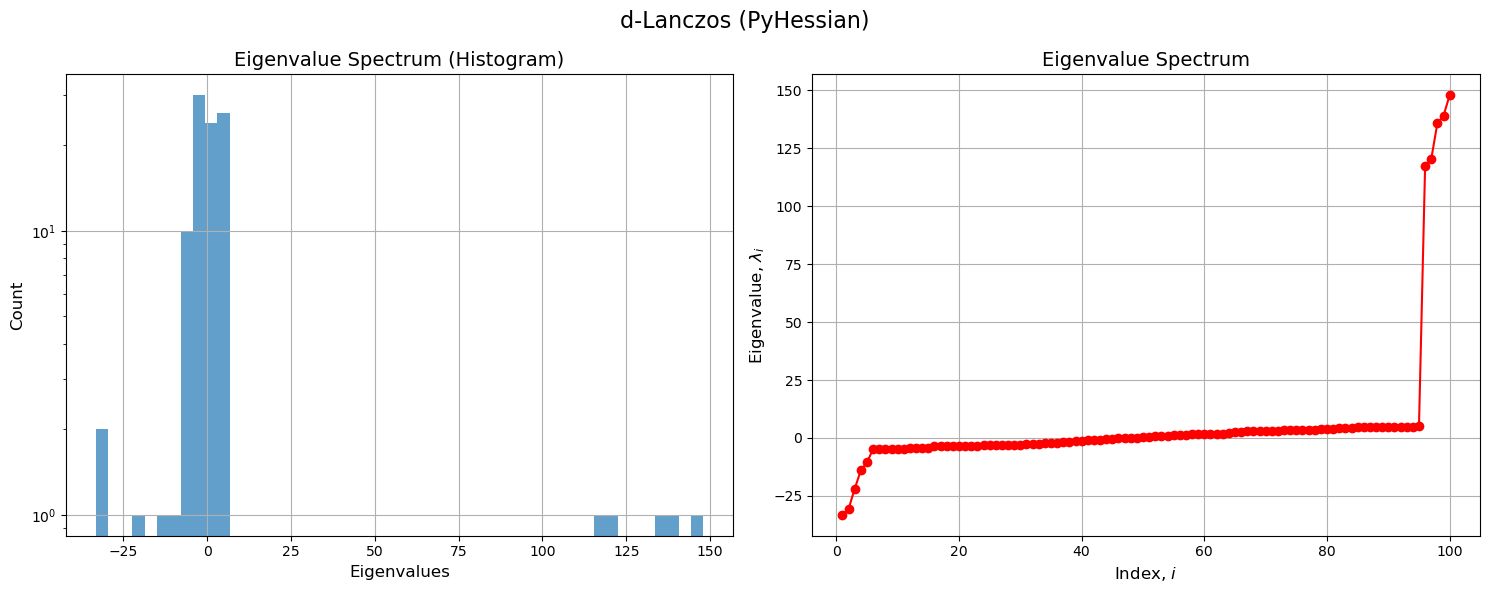

L2 distance: 14.963454246520996


In [27]:
d_value_papyan = 15
eigenvalues_d_lanzcos_papyan, _, alpha_d_pyhessian, beta_d_pyhessian = mtx.d_lanczos_papyan(mtx_size, seed=seed, d=d_value_papyan)
plot_spectrum_combined(eigenvalues_d_lanzcos_papyan, num_bins=num_bins, title='d-Lanczos (PyHessian)')
# Calculate the L2 distance
print(f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_d_lanzcos_papyan), 2)}")

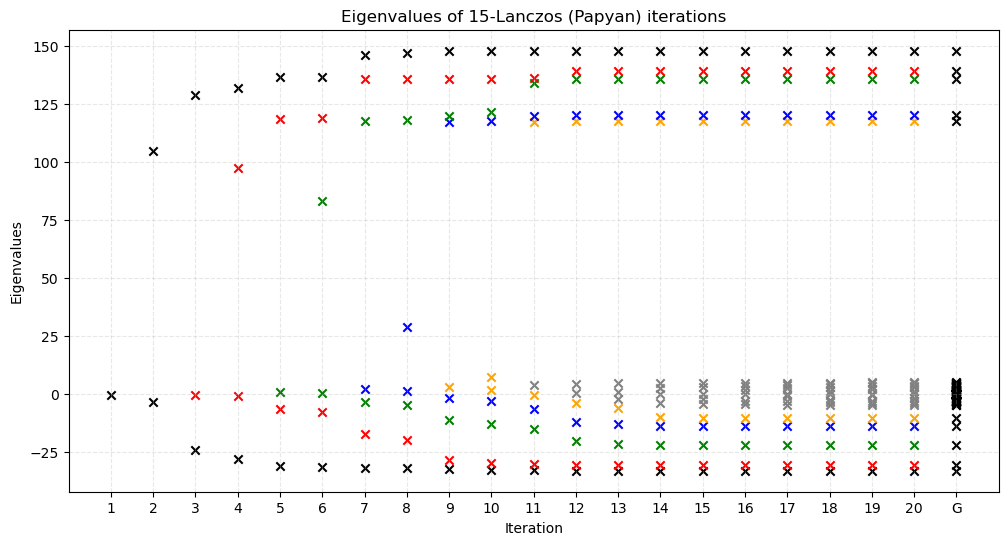

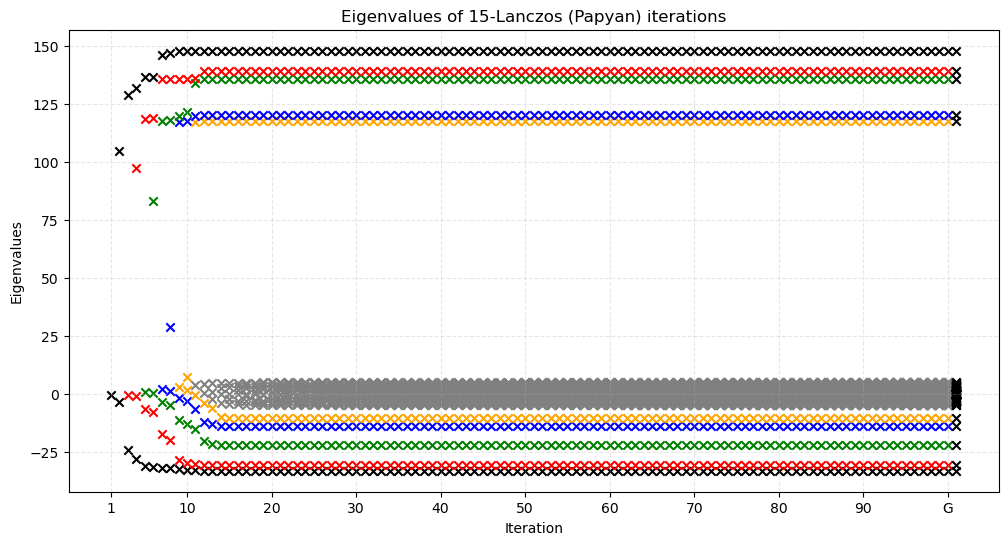

In [28]:
eigenvalues_d_lanczos_pyhessian_list = []
for iter in range(num_iterations):
    result, _, _, _ = mtx.d_lanczos_papyan(iter+1, seed=seed, d=d_value_papyan)
    eigenvalues_d_lanczos_pyhessian_list.append(result)
eigenvalues_d_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_d_lanczos_pyhessian_list, f"{d_value_papyan}-Lanczos (Papyan)")
eigenvalues_d_lanczos_pyhessian_list.pop()
for iter in range(num_iterations, 100):
    result, _, _, _ = mtx.d_lanczos_papyan(iter+1, seed=seed, d=d_value_papyan)
    eigenvalues_d_lanczos_pyhessian_list.append(result)
eigenvalues_d_lanczos_pyhessian_list.append(eigenvalues)
plot_lanczos_iterations(eigenvalues_d_lanczos_pyhessian_list, f"{d_value_papyan}-Lanczos (Papyan)")

#### Compare eigenvalues obtained by different algorithms

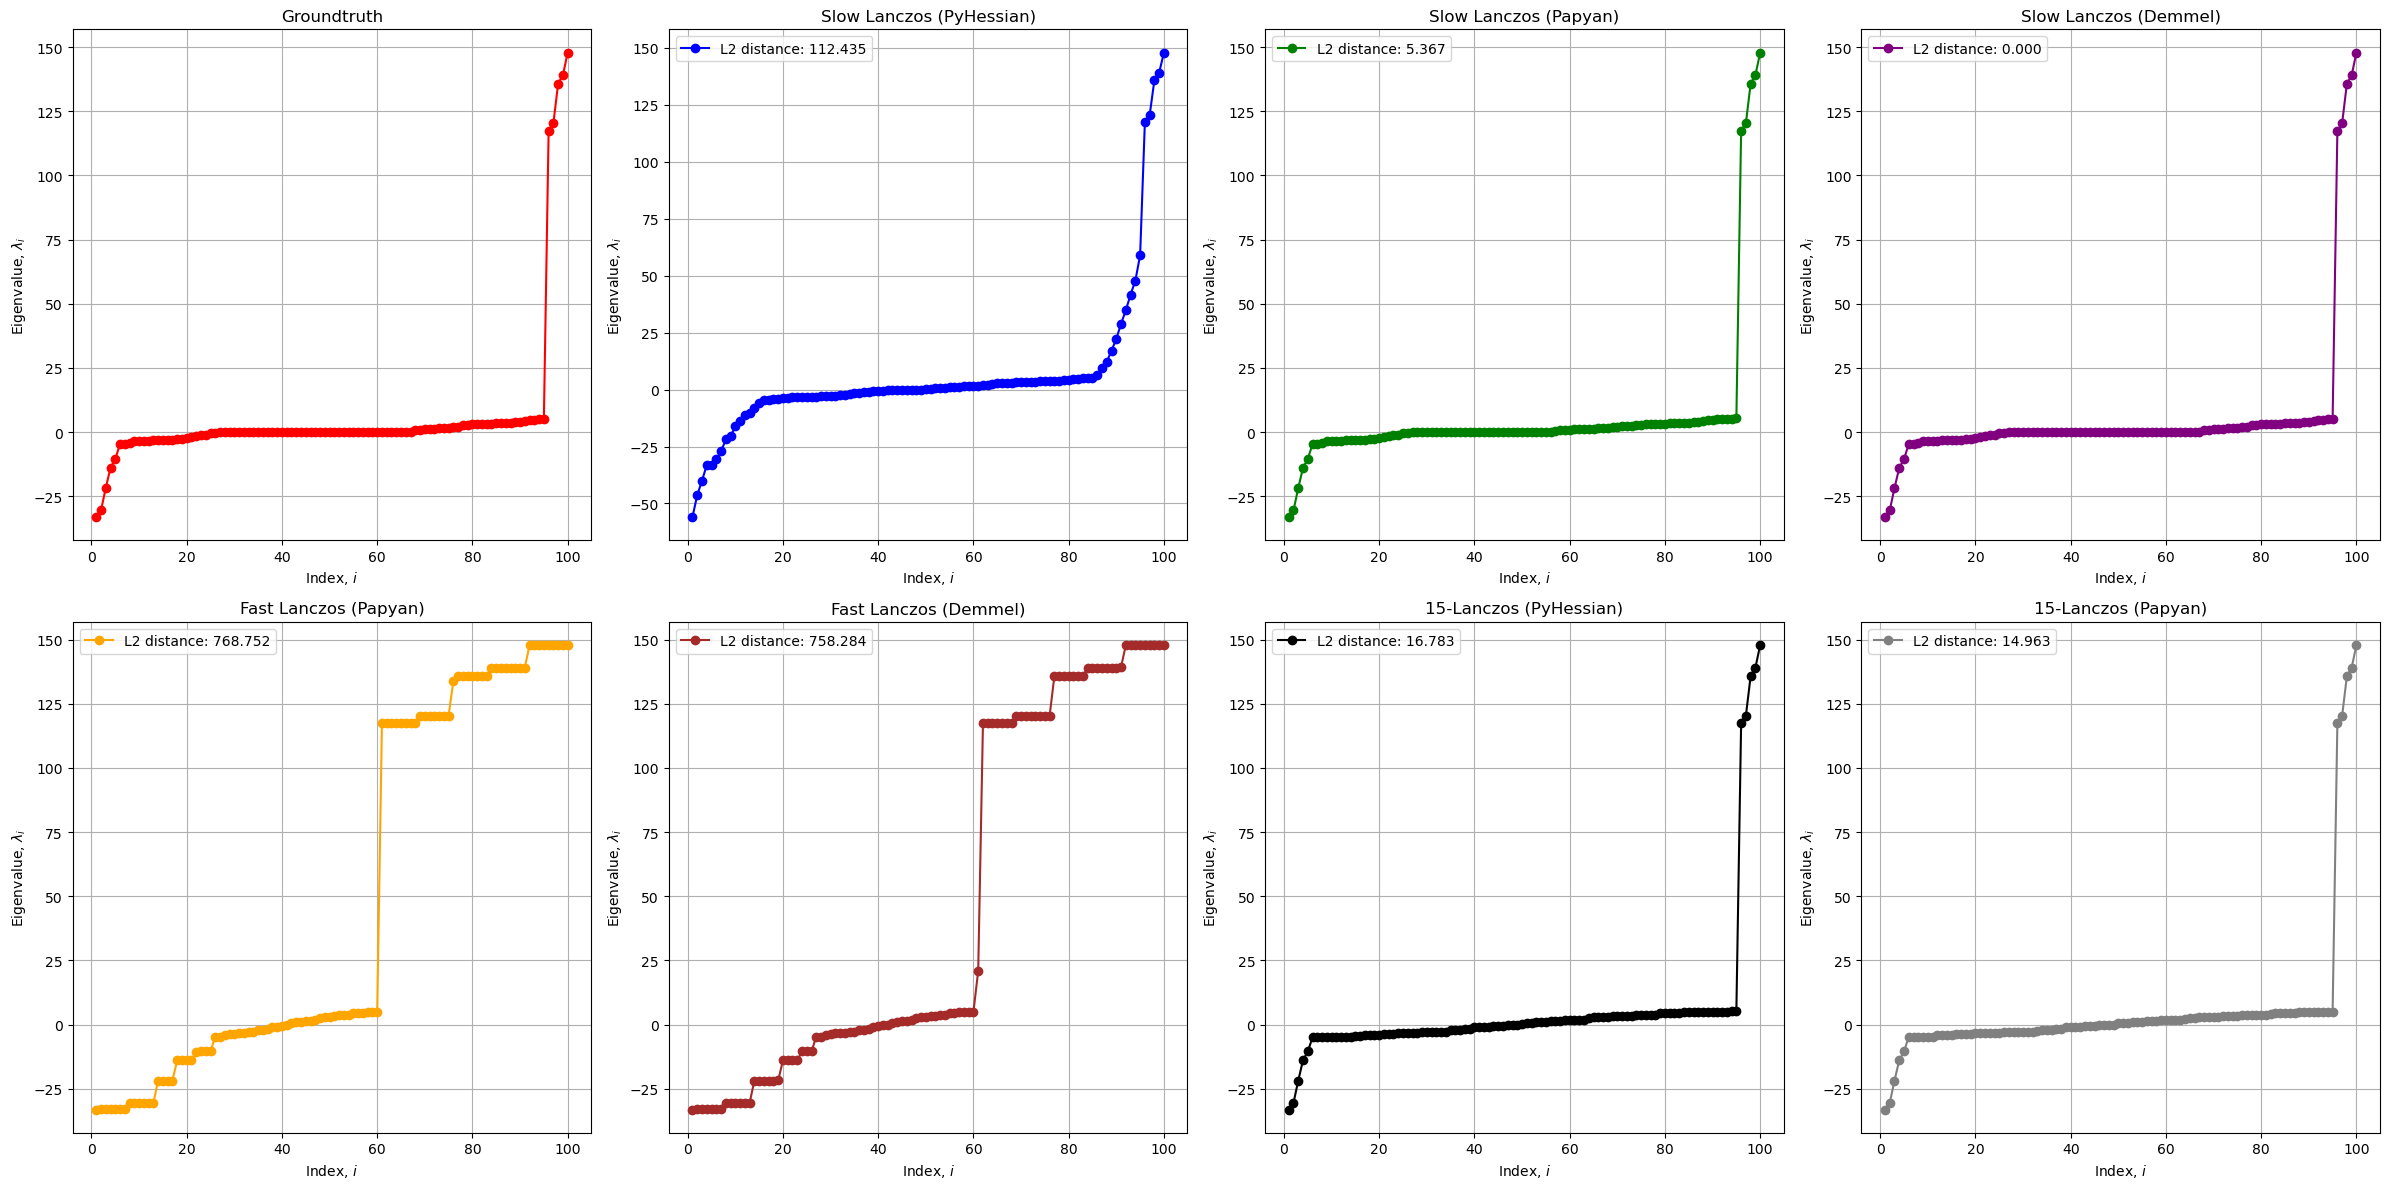

In [29]:
# convert to torch tensors
eigenvalues_slow_lanczos_pyhessian = torch.FloatTensor(eigenvalues_slow_lanczos_pyhessian)
eigenvalues_slow_lanczos_papyan = torch.FloatTensor(eigenvalues_slow_lanczos_papyan)
eigenvalues_slow_lanczos_demmel = torch.FloatTensor(eigenvalues_slow_lanczos_demmel)
eigenvalues_fast_lanczos_papyan = torch.FloatTensor(eigenvalues_fast_lanczos_papyan)
eigenvalues_fast_lanczos_demmel = torch.FloatTensor(eigenvalues_fast_lanczos_demmel)
eigenvalues_d_lanzcos_pyhessian = torch.FloatTensor(eigenvalues_d_lanzcos_pyhessian)
eigenvalues_d_lanzcos_papyan = torch.FloatTensor(eigenvalues_d_lanzcos_papyan)
# plot the eigenvalues
fig, ax = plt.subplots(2, 4, figsize=(24, 12))
x_indices = torch.arange(1, mtx_size+1)
# Groundtruth
ax[0, 0].plot(x_indices, torch.sort(eigenvalues).values, marker="o", linestyle="-", color="red")
ax[0, 0].set_xlabel(r"Index, $i$")
ax[0, 0].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[0, 0].set_title("Groundtruth")
ax[0, 0].grid(True)
# Slow Lanczos (PyHessian)
ax[0, 1].plot(x_indices, torch.sort(eigenvalues_slow_lanczos_pyhessian).values, marker="o", linestyle="-", color="blue")
ax[0, 1].set_xlabel(r"Index, $i$")
ax[0, 1].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[0, 1].set_title("Slow Lanczos (PyHessian)")
ax[0, 1].grid(True)
ax[0, 1].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_pyhessian), 2):.3f}"])
# Slow Lanczos (Papyan)
ax[0, 2].plot(x_indices, torch.sort(eigenvalues_slow_lanczos_papyan).values, marker="o", linestyle="-", color="green")
ax[0, 2].set_xlabel(r"Index, $i$")
ax[0, 2].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[0, 2].set_title("Slow Lanczos (Papyan)")
ax[0, 2].grid(True)
ax[0, 2].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_papyan), 2):.3f}"])
# Slow Lanczos (Demmel)
ax[0, 3].plot(x_indices, torch.sort(eigenvalues_slow_lanczos_demmel).values, marker="o", linestyle="-", color="purple")
ax[0, 3].set_xlabel(r"Index, $i$")
ax[0, 3].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[0, 3].set_title("Slow Lanczos (Demmel)")
ax[0, 3].grid(True)
ax[0, 3].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_slow_lanczos_demmel), 2):.3f}"])
# Fast Lanczos (Papyan)
ax[1, 0].plot(x_indices, torch.sort(eigenvalues_fast_lanczos_papyan).values, marker="o", linestyle="-", color="orange")
ax[1, 0].set_xlabel(r"Index, $i$")
ax[1, 0].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[1, 0].set_title("Fast Lanczos (Papyan)")
ax[1, 0].grid(True)
ax[1, 0].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_fast_lanczos_papyan), 2):.3f}"])
# Fast Lanczos (Demmel)
ax[1, 1].plot(x_indices, torch.sort(eigenvalues_fast_lanczos_demmel).values, marker="o", linestyle="-", color="brown")
ax[1, 1].set_xlabel(r"Index, $i$")
ax[1, 1].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[1, 1].set_title("Fast Lanczos (Demmel)")
ax[1, 1].grid(True)
ax[1, 1].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_fast_lanczos_demmel), 2):.3f}"])
# d-Lanczos (PyHessian)
ax[1, 2].plot(x_indices, torch.sort(eigenvalues_d_lanzcos_pyhessian).values, marker="o", linestyle="-", color="black")
ax[1, 2].set_xlabel(r"Index, $i$")
ax[1, 2].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[1, 2].set_title(f"{d_value_pyhessian}-Lanczos (PyHessian)")
ax[1, 2].grid(True)
ax[1, 2].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_d_lanzcos_pyhessian), 2):.3f}"])
# d-Lanczos (PyHessian)
ax[1, 3].plot(x_indices, torch.sort(eigenvalues_d_lanzcos_papyan).values, marker="o", linestyle="-", color="gray")
ax[1, 3].set_xlabel(r"Index, $i$")
ax[1, 3].set_ylabel(r"Eigenvalue, $\lambda_{i}$")
ax[1, 3].set_title(f"{d_value_papyan}-Lanczos (Papyan)")
ax[1, 3].grid(True)
ax[1, 3].legend([f"L2 distance: {lp_distance(eigenvalues, torch.FloatTensor(eigenvalues_d_lanzcos_papyan), 2):.3f}"])
plt.tight_layout()
plt.show()

In [30]:
# check positive extremes
print("Check positive extremes:")
print(f"Groundtruth: {torch.sort(eigenvalues[eigenvalues > dict_eigenvalues['pos_low']]).values}")
print(f"Slow Lanczos (PyHessian): {torch.sort(eigenvalues_slow_lanczos_pyhessian[eigenvalues_slow_lanczos_pyhessian > dict_eigenvalues['pos_low']]).values}")
print(f"Slow Lanczos (Papyan): {torch.sort(eigenvalues_slow_lanczos_papyan[eigenvalues_slow_lanczos_papyan > dict_eigenvalues['pos_low']]).values}")
print(f"Slow Lanczos (Demmel): {torch.sort(eigenvalues_slow_lanczos_demmel[eigenvalues_slow_lanczos_demmel > dict_eigenvalues['pos_low']]).values}")
print(f"Fast Lanczos (Papyan): {torch.sort(eigenvalues_fast_lanczos_papyan[eigenvalues_fast_lanczos_papyan > dict_eigenvalues['pos_low']]).values}")
print(f"Fast Lanczos (Demmel): {torch.sort(eigenvalues_fast_lanczos_demmel[eigenvalues_fast_lanczos_demmel > dict_eigenvalues['pos_low']]).values}")
print(f"{d_value_pyhessian}-Lanczos (PyHessian): {torch.sort(eigenvalues_d_lanzcos_pyhessian[eigenvalues_d_lanzcos_pyhessian > dict_eigenvalues['pos_low']]).values}")
print(f"{d_value_papyan}-Lanczos (Papyan): {torch.sort(eigenvalues_d_lanzcos_papyan[eigenvalues_d_lanzcos_papyan > dict_eigenvalues['pos_low']]).values}")


Check positive extremes:
Groundtruth: tensor([117.4321, 120.3745, 135.8251, 139.0948, 147.8971])
Slow Lanczos (PyHessian): tensor([117.4321, 120.3744, 135.8250, 139.0948, 147.8969])
Slow Lanczos (Papyan): tensor([117.4319, 120.3744, 135.8250, 139.0945, 147.8969])
Slow Lanczos (Demmel): tensor([117.4319, 120.3744, 135.8250, 139.0947, 147.8970])
Fast Lanczos (Papyan): tensor([117.3988, 117.4319, 117.4320, 117.4320, 117.4320, 117.4320, 117.4322,
        117.4323, 120.3742, 120.3742, 120.3743, 120.3743, 120.3744, 120.3745,
        120.3745, 134.0594, 135.8247, 135.8249, 135.8250, 135.8250, 135.8250,
        135.8252, 135.8254, 139.0944, 139.0947, 139.0949, 139.0950, 139.0950,
        139.0950, 139.0951, 139.0953, 147.8968, 147.8969, 147.8969, 147.8969,
        147.8970, 147.8971, 147.8972, 147.8973, 147.8977])
Fast Lanczos (Demmel): tensor([117.4318, 117.4319, 117.4319, 117.4321, 117.4321, 117.4322, 117.4324,
        120.3743, 120.3745, 120.3745, 120.3747, 120.3747, 120.3748, 120.3751,
   

In [31]:
# check negative extremes
print("Check negative extremes:")
print(f"Groundtruth: {torch.sort(eigenvalues[eigenvalues < dict_eigenvalues['neg_high']]).values}")
print(f"Slow Lanczos (PyHessian): {torch.sort(eigenvalues_slow_lanczos_pyhessian[eigenvalues_slow_lanczos_pyhessian < dict_eigenvalues['neg_high']]).values}")
print(f"Slow Lanczos (Papyan): {torch.sort(eigenvalues_slow_lanczos_papyan[eigenvalues_slow_lanczos_papyan < dict_eigenvalues['neg_high']]).values}")
print(f"Slow Lanczos (Demmel): {torch.sort(eigenvalues_slow_lanczos_demmel[eigenvalues_slow_lanczos_demmel < dict_eigenvalues['neg_high']]).values}")
print(f"Fast Lanczos (Papyan): {torch.sort(eigenvalues_fast_lanczos_papyan[eigenvalues_fast_lanczos_papyan < dict_eigenvalues['neg_high']]).values}")
print(f"Fast Lanczos (Demmel): {torch.sort(eigenvalues_fast_lanczos_demmel[eigenvalues_fast_lanczos_demmel < dict_eigenvalues['neg_high']]).values}")
print(f"{d_value_pyhessian}-Lanczos (PyHessian): {torch.sort(eigenvalues_d_lanzcos_pyhessian[eigenvalues_d_lanzcos_pyhessian < dict_eigenvalues['neg_high']]).values}")
print(f"{d_value_papyan}-Lanczos (Papyan): {torch.sort(eigenvalues_d_lanzcos_papyan[eigenvalues_d_lanzcos_papyan < dict_eigenvalues['neg_high']]).values}")


Check negative extremes:
Groundtruth: tensor([-33.1304, -30.5801, -21.8473, -13.9318, -10.5014])
Slow Lanczos (PyHessian): tensor([-55.9390, -46.3172, -40.0318, -33.1303, -33.0574, -30.5801, -27.1921,
        -21.8473, -20.5118, -16.1284, -13.9318, -11.1390, -10.5014])
Slow Lanczos (Papyan): tensor([-33.1304, -30.5801, -21.8473, -13.9318, -10.5014])
Slow Lanczos (Demmel): tensor([-33.1304, -30.5801, -21.8473, -13.9318, -10.5014])
Fast Lanczos (Papyan): tensor([-33.1304, -33.1304, -33.1304, -33.1303, -33.1303, -33.1302, -33.1299,
        -30.5801, -30.5801, -30.5801, -30.5800, -30.5800, -30.5800, -21.8473,
        -21.8473, -21.8473, -21.8472, -13.9943, -13.9318, -13.9318, -13.9317,
        -10.8037, -10.5014, -10.5014, -10.5014])
Fast Lanczos (Demmel): tensor([-33.1304, -33.1304, -33.1303, -33.1303, -33.1302, -33.1301, -33.0580,
        -30.5801, -30.5801, -30.5801, -30.5800, -30.5799, -30.5798, -21.8478,
        -21.8475, -21.8474, -21.8473, -21.8473, -21.8185, -13.9318, -13.9318,
   

In [32]:
# check number of exact zeros
print("Check number of exact zeros:")
print(f"Groundtruth: {torch.sum(eigenvalues == 0)}")
print(f"Slow Lanczos (PyHessian): {torch.sum(eigenvalues_slow_lanczos_pyhessian == 0)}")
print(f"Slow Lanczos (Papyan): {torch.sum(eigenvalues_slow_lanczos_papyan == 0)}")
print(f"Slow Lanczos (Demmel): {torch.sum(eigenvalues_slow_lanczos_demmel == 0)}")
print(f"Fast Lanczos (Papyan): {torch.sum(eigenvalues_fast_lanczos_papyan == 0)}")
print(f"Fast Lanczos (Demmel): {torch.sum(eigenvalues_fast_lanczos_demmel == 0)}")
print(f"{d_value_pyhessian}-Lanczos (PyHessian): {torch.sum(eigenvalues_d_lanzcos_pyhessian == 0)}")
print(f"{d_value_papyan}-Lanczos (Papyan): {torch.sum(eigenvalues_d_lanzcos_papyan == 0)}")

Check number of exact zeros:
Groundtruth: 40
Slow Lanczos (PyHessian): 0
Slow Lanczos (Papyan): 0
Slow Lanczos (Demmel): 32
Fast Lanczos (Papyan): 0
Fast Lanczos (Demmel): 0
15-Lanczos (PyHessian): 0
15-Lanczos (Papyan): 0


In [33]:
# check number of close to zeros
print("Check number of close to zeros:")
threshold = 1e-3
print(f"Groundtruth: {torch.sum(torch.abs(eigenvalues) < threshold)}")
print(f"Slow Lanczos (PyHessian): {torch.sum(torch.abs(eigenvalues_slow_lanczos_pyhessian) < threshold)}")
print(f"Slow Lanczos (Papyan): {torch.sum(torch.abs(eigenvalues_slow_lanczos_papyan) < threshold)}")
print(f"Slow Lanczos (Demmel): {torch.sum(torch.abs(eigenvalues_slow_lanczos_demmel) < threshold)}")
print(f"Fast Lanczos (Papyan): {torch.sum(torch.abs(eigenvalues_fast_lanczos_papyan) < threshold)}")
print(f"Fast Lanczos (Demmel): {torch.sum(torch.abs(eigenvalues_fast_lanczos_demmel) < threshold)}")
print(f"{d_value_pyhessian}-Lanczos (PyHessian): {torch.sum(torch.abs(eigenvalues_d_lanzcos_pyhessian) < threshold)}")
print(f"{d_value_papyan}-Lanczos (Papyan): {torch.sum(torch.abs(eigenvalues_d_lanzcos_papyan) < threshold)}")

Check number of close to zeros:
Groundtruth: 40
Slow Lanczos (PyHessian): 5
Slow Lanczos (Papyan): 15
Slow Lanczos (Demmel): 40
Fast Lanczos (Papyan): 1
Fast Lanczos (Demmel): 1
15-Lanczos (PyHessian): 2
15-Lanczos (Papyan): 2


#### Compare $\alpha_k$ and $\beta_k$ obtained by different algorithms

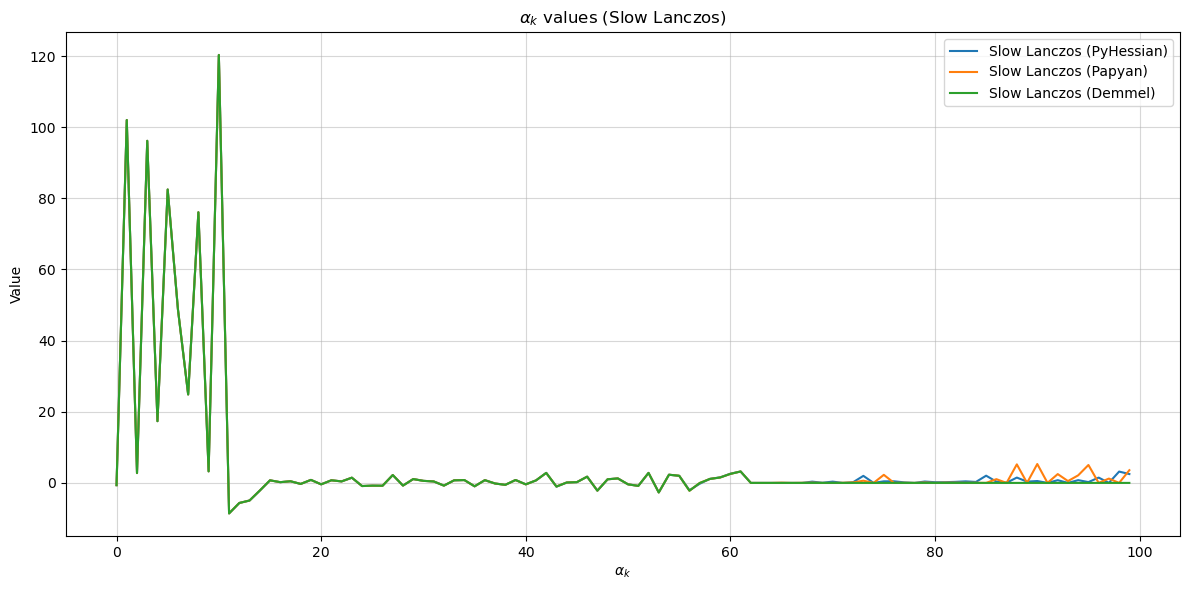

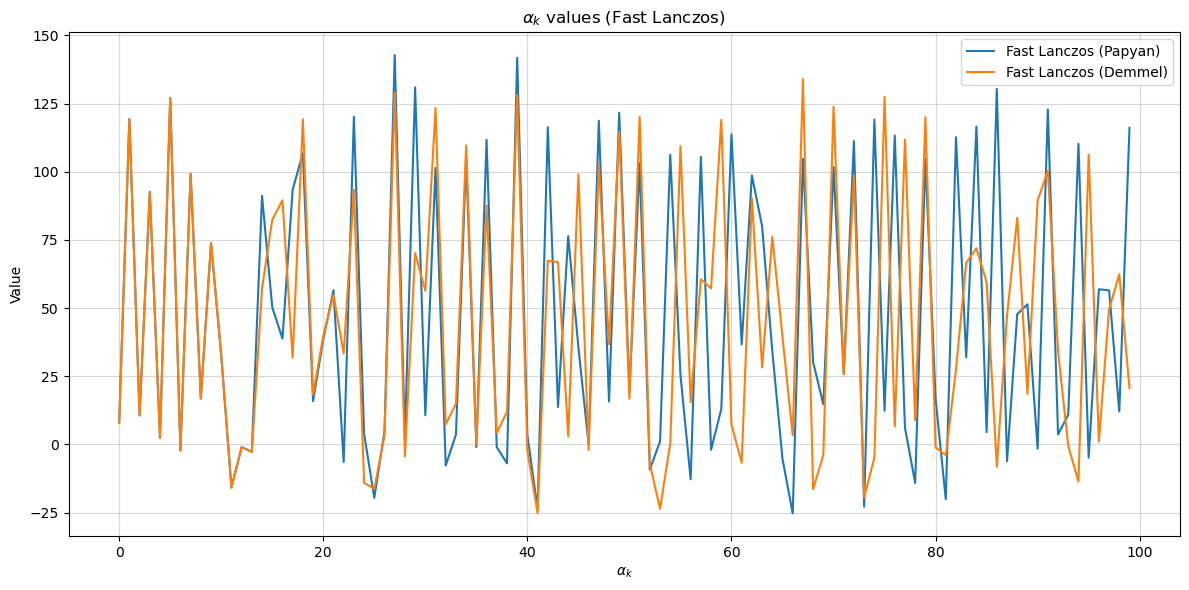

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(alpha_slow_pyhessian, label='Slow Lanczos (PyHessian)')
plt.plot(alpha_slow_papyan, label='Slow Lanczos (Papyan)')
plt.plot(alpha_slow_demmel, label='Slow Lanczos (Demmel)')
plt.title(r"$\alpha_k$ values (Slow Lanczos)")
plt.xlabel(r"$\alpha_k$")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.5)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(alpha_fast_papyan, label='Fast Lanczos (Papyan)')
plt.plot(alpha_fast_demmel, label='Fast Lanczos (Demmel)')
plt.title(r"$\alpha_k$ values (Fast Lanczos)")
plt.xlabel(r"$\alpha_k$")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.5)
plt.show()

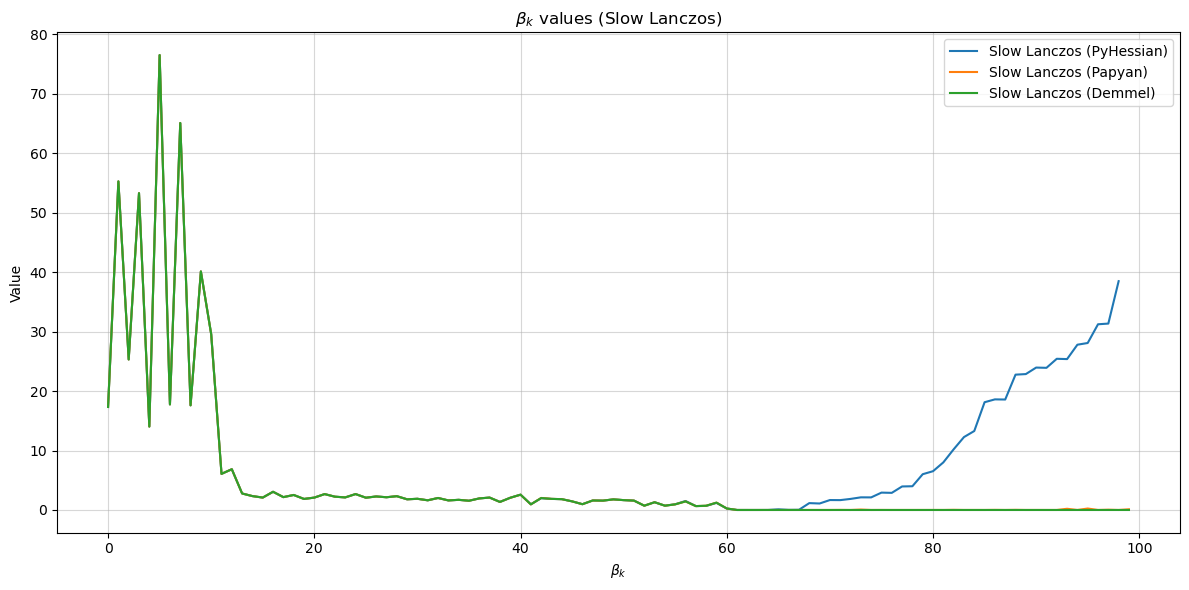

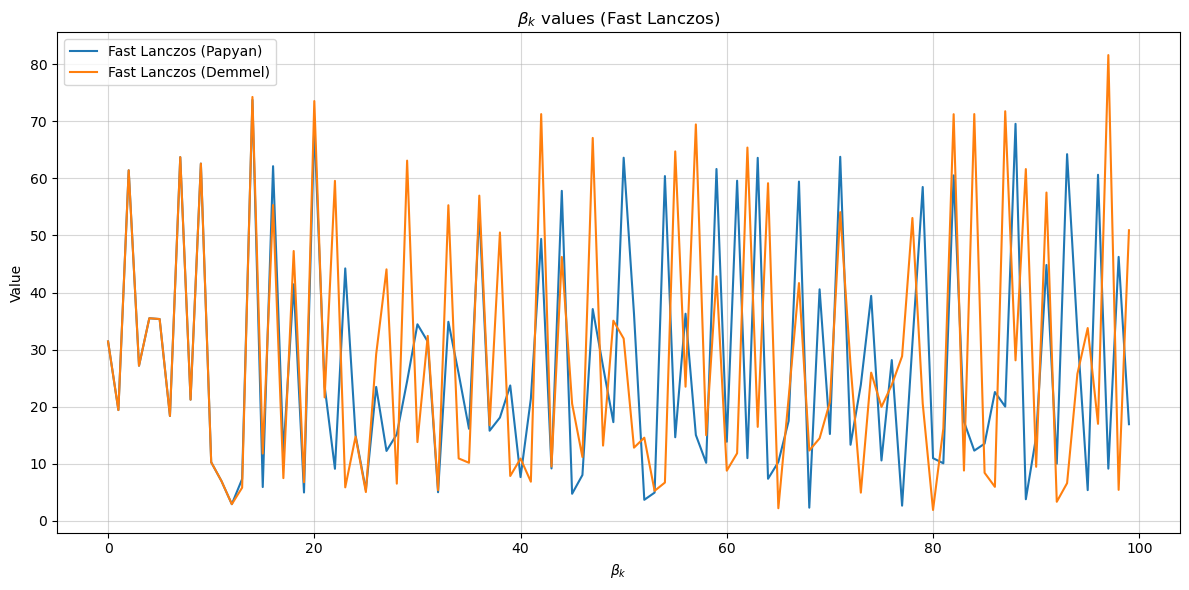

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(beta_slow_pyhessian, label='Slow Lanczos (PyHessian)')
plt.plot(beta_slow_papyan, label='Slow Lanczos (Papyan)')
plt.plot(beta_slow_demmel, label='Slow Lanczos (Demmel)')
plt.title(r"$\beta_k$ values (Slow Lanczos)")
plt.xlabel(r"$\beta_k$")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.5)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(beta_fast_papyan, label='Fast Lanczos (Papyan)')
plt.plot(beta_fast_demmel, label='Fast Lanczos (Demmel)')
plt.title(r"$\beta_k$ values (Fast Lanczos)")
plt.xlabel(r"$\beta_k$")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.5)
plt.show()